hacer clusterizacion por características personales: alcohol...
hacer clusterizacion por caracteristicas académicas: nota... 

probar primero con k means

### Título: Proyecto final de asignatura (2.3: Clusterización)
### Autores: Grupo 2 
### Asignatura: Aprendizaje Automático

**Clusterización**: el centro educativo quiere identificar perfiles de estudiantes para poder ofrecer
una educación más personalizada. Así pues, el propósito sería hacer emerger algunos grupos
de estudiantes con características similares. Estos clústeres deberán ser fáciles de explicar y de
interpretar.

**Bibliografía**:
 
David, V. H. J. (2021, December 8). Análisis de clúster automático. https://repositorio.unal.edu.co/handle/unal/80784

### Importaciones

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import joblib 
import shap 

In [64]:
df_personal =pd.read_csv('DF4.1_proy_escuela_eda_clusterizacion_personales.csv')
df_personal.head()

sexo      edad  familia_numerosa  independizado_padres  \
0 -1.189158 -1.424965          1.578115              0.376386   
1  0.840931  0.963050         -0.633668              0.376386   
2 -1.189158  0.167045         -0.633668              0.376386   
3  0.840931  0.963050         -0.633668              0.376386   
4 -1.189158  1.759054         -0.633668              0.376386   

   educacion_madre  educacion_padre  internet_casa  apoyo_familiar  \
0         1.300376         0.628064       0.566111        0.788227   
1        -0.490091        -0.287306       0.566111       -1.268670   
2         0.405142        -0.287306       0.566111        0.788227   
3         1.300376         1.543434       0.566111        0.788227   
4         1.300376        -0.287306       0.566111        0.788227   

   actividades  relacion_romantica  ...  entorno_urbano  madre_casa  \
0     1.022143           -0.767076  ...        0.639328   -0.506834   
1    -0.978337            1.303652  ...       -1.564142   -0.506834   
2     1.022143           -0.767076  ...        0.639328   -0.506834   
3     1.022143            1.303652  ...        0.639328   -0.506834   
4     1.022143            1.303652  ...        0.639328   -0.506834   

   madre_prof  madre_salud  madre_serv  padre_casa  padre_prof  padre_salud  \
0    2.679385    -0.288104   -0.509676   -0.269086    -0.24487    -0.178928   
1   -0.373220    -0.288104    1.962029   -0.269086    -0.24487    -0.178928   
2   -0.373220    -0.288104    1.962029   -0.269086    -0.24487    -0.178928   
3   -0.373220     3.470968   -0.509676   -0.269086    -0.24487     5.588854   
4   -0.373220     3.470968   -0.509676   -0.269086    -0.24487    -0.178928   

   padre_serv  tiempo_viaje  
0    1.599513     -0.750471  
1   -0.625190      0.606817  
2    1.599513     -0.750471  
3   -0.625190     -0.750471  
4   -0.625190      0.606817  

[5 rows x 25 columns]

In [65]:
df_academico =pd.read_csv('DF4.2_proy_escuela_eda_clusterizacion_academicas.csv')
df_academico.head()

interes_educacion_superior  tiempo_estudio  apoyo_escolar  suspensos  \
0                    0.347353        1.270781      -0.340719  -0.357462   
1                    0.347353        1.270781      -0.340719  -0.357462   
2                    0.347353       -1.130557      -0.340719   4.752689   
3                    0.347353        0.070112       2.934968   1.345922   
4                    0.347353        0.070112      -0.340719  -0.357462   

     faltas     nota1     nota2     nota3  campus_coruna  razon_cerca  \
0 -0.793246  0.881372  0.750552  0.574941       0.708075     1.811422   
1  0.279555  0.881372  0.750552  0.883830      -1.412280     1.811422   
2 -0.364126 -1.287754 -1.250920 -1.587287       0.708075    -0.552052   
3 -0.364126  0.881372  0.083395  0.266051       0.708075    -0.552052   
4  1.137795 -0.203191 -0.583763 -0.660618       0.708075    -0.552052   

   razon_curso  razon_rep  
0    -0.863263  -0.543607  
1    -0.863263  -0.543607  
2     1.158396  -0.543607  
3    -0.863263   1.839565  
4     1.158396  -0.543607

### Clusterización por Kmeans

### Método del codo

In [66]:
# Método del codo para determinar el número de clusters
from sklearn.cluster import KMeans

def metodo_codo(df, max_k = 10):
    """Aplica el método del codo para determinar el número de clusters óptimo en un modelo KMeans.

    Args:
        df (csv): dataframe con los datos a clusterizar.
        max_k (int): número máximo de clusters a considerar, por defecto k=10.

    """
    sum_distancias_cuadrado = []

    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k)
        kmeans = kmeans.fit(df)
        sum_distancias_cuadrado.append(kmeans.inertia_)
    

    # Graficar la curva del codo
    plt.plot(range(1, max_k+1), sum_distancias_cuadrado, 'bx-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Suma de las Distancias al Cuadrado')
    plt.title('Curva del Codo')
    plt.show()

#### Variables personales

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

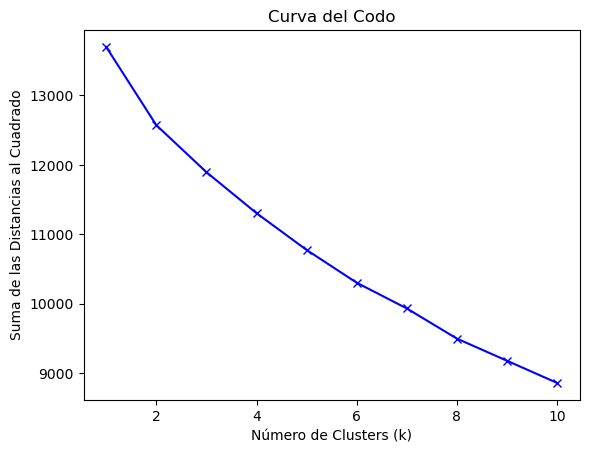

In [67]:
metodo_codo(df_personal)

Se observan codos para los cluster de las variables personales en k = 2, 4, 5

#### Variables académicas

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

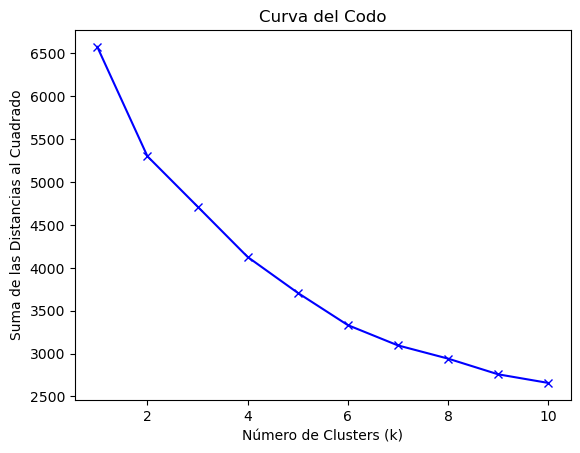

In [68]:
metodo_codo(df_academico)

Se observan codos para los cluster de las variables académicas en k = 2, 4, 6, siendo el más evidente k=2

### Método de la silueta

In [69]:
# Método de la silueta para determinar el número de clusters
from sklearn.metrics import silhouette_score, silhouette_samples

def metodo_silueta(df, max_k=10):
    """Aplica el método de la silueta para determinar el número de clusters óptimo en un modelo KMeans.

    Args:
        df (DataFrame): dataframe con los datos a clusterizar.
        max_k (int): número máximo de clusters a considerar, por defecto k=10.

    Returns:
        mejores_k (list): lista con los mejores clústeres ordenados por el coeficiente de silueta de mejor a peor.
    """
    coeficientes_silueta = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        coeficientes_silueta.append(silhouette_avg)

        # Calcular los valores de la silueta para cada muestra
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        # Graficar la silueta para cada k
        fig, ax = plt.subplots(figsize=(8, 6))
        y_lower = 10
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.Spectral(float(i) / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # Espaciado entre clústeres

        ax.set_title(f"Gráfico de la Silueta para k={k}")
        ax.set_xlabel("Coeficiente de silueta")
        ax.set_ylabel("ID del clúster")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--") # Línea vertical para la media
        ax.set_yticks([])  # Sin ticks en el eje y
        ax.set_xlim([-0.1, 1]) # Límite en el coeficiente de la silueta, sirve para comparar entre gráficos

        plt.show()

    # Ordenar los k por coeficiente de silueta de mayor a menor
    mejores_k = np.argsort(coeficientes_silueta)[::-1] + 2 # argsort devuelve los índices ordenados, se suma 2 para que empiece en 2
    coeficientes_correspondientes = np.sort(coeficientes_silueta)[::-1] # sort devuelve los valores ordenados
    return mejores_k, coeficientes_correspondientes

#### Interpretación del Gráfico de Silueta
##### Altura de las Barras:
- La altura de las barras en el gráfico de silueta representa el coeficiente de silueta de cada punto.
- Barras más altas indican que los puntos están bien agrupados dentro de su clúster y están lejos de los puntos de otros clústeres.
- Barras más bajas (especialmente aquellas con valores negativos) indican que los puntos están mal agrupados y podrían pertenecer a otro clúster.
 
##### Línea Roja Vertical:
- La línea roja vertical indica el coeficiente de silueta promedio para todos los puntos.
- Un valor promedio alto sugiere una buena calidad de clustering.
- Si la línea roja está cerca de 1, los clústeres están bien separados y son compactos.
- Si la línea roja está cerca de 0, los clústeres se superponen y no están bien definidos.
 
##### Distribución de los Clústeres:
- Observa cómo se distribuyen los puntos dentro de cada clúster.
- Idealmente, los clústeres deben tener una distribución compacta y bien separada.
- Si un clúster tiene muchas barras con valores negativos, es una señal de que los puntos en ese clúster están mal agrupados.
 
##### Comparación entre Diferentes Valores de k:
- Compara los gráficos de silueta para diferentes valores de k.
- Busca el valor de k que tenga la línea roja vertical más alta y barras más altas en general.
- Este valor de k es el que proporciona la mejor calidad de clustering según el método de la silueta.

#### Variables personales

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


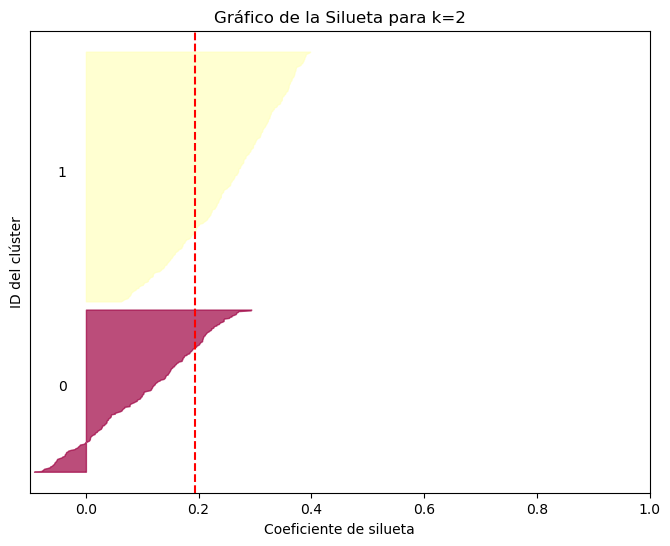

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


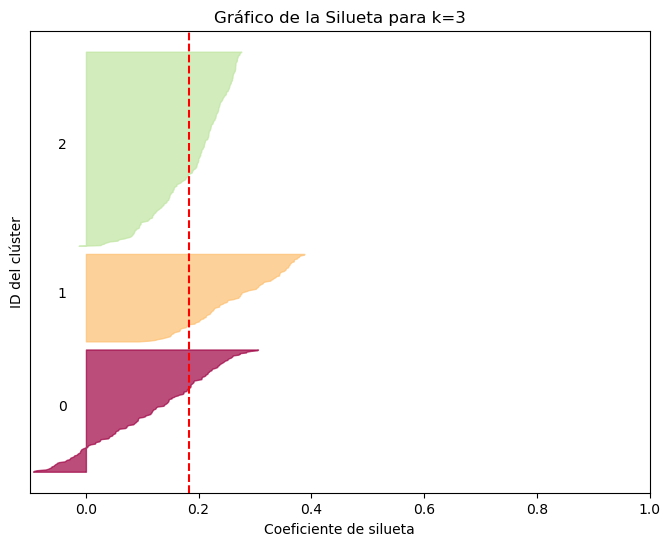

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


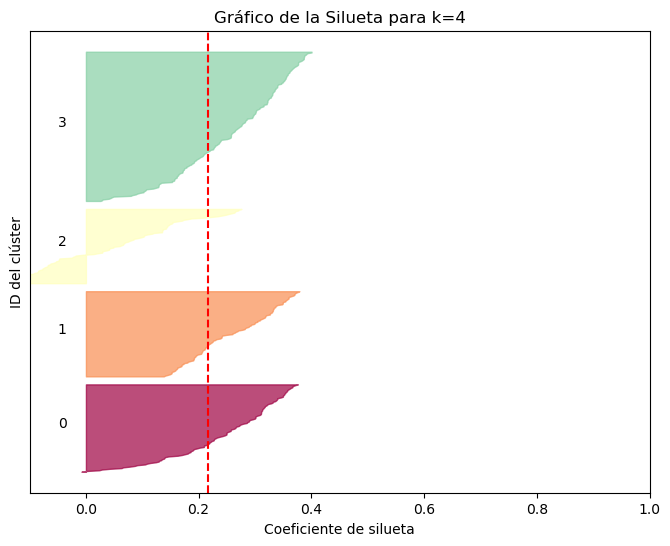

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


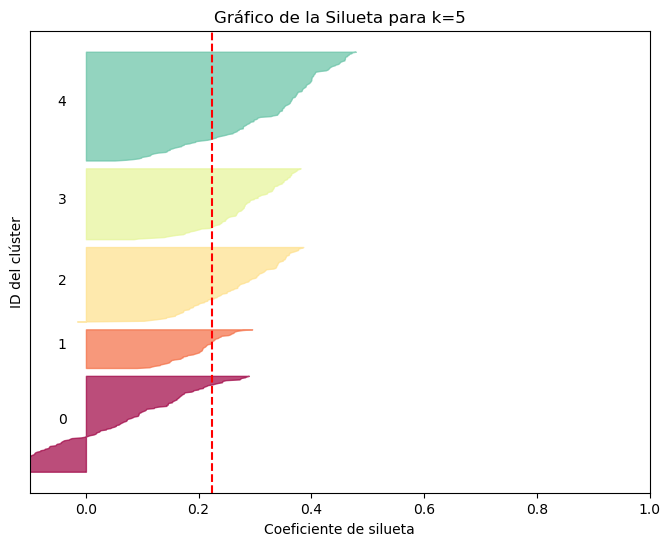

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


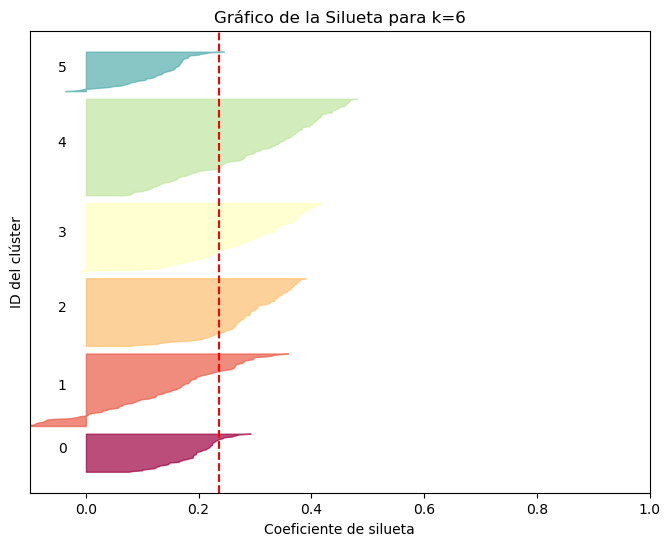

Mejores k según el método de la silueta: [6 5 4 2 3]
Coeficientes de silueta correspondientes: [0.23644543 0.22413226 0.21725255 0.19328418 0.18278202]


In [70]:
# Aplicar el método de la silueta
mejores_k, coeficientes_silueta = metodo_silueta(df_academico, max_k=6)
print("Mejores k según el método de la silueta:", mejores_k)
print("Coeficientes de silueta correspondientes:", coeficientes_silueta)

Recordemos que con el método del codo se observaban codos con el df_personal en 2, 4, 5.
 
Dentro de los candidatos que tenemos con el método del codo, los que mejor posicionados visualmente por el método de la silueta son k = 5 y después k = 4

#### Variables académicas

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


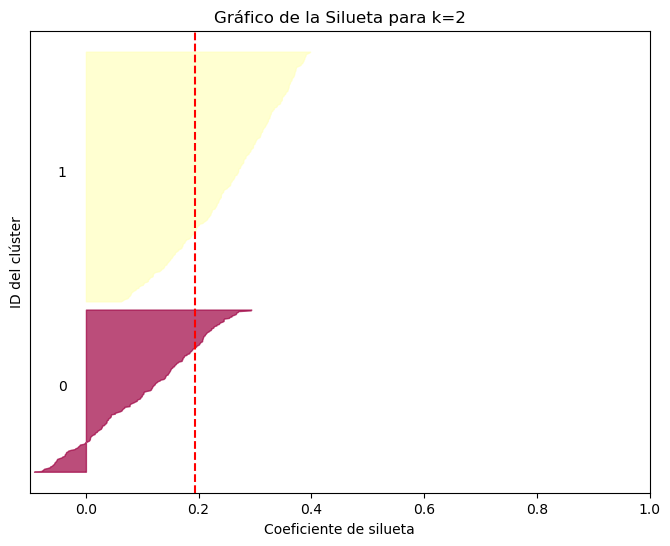

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


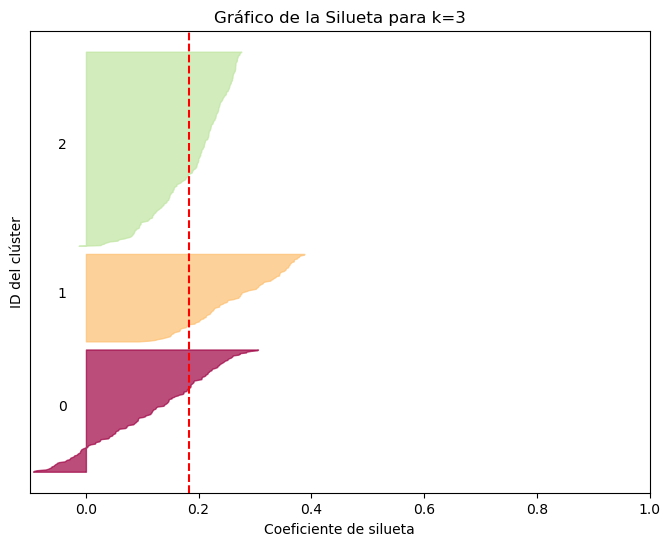

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


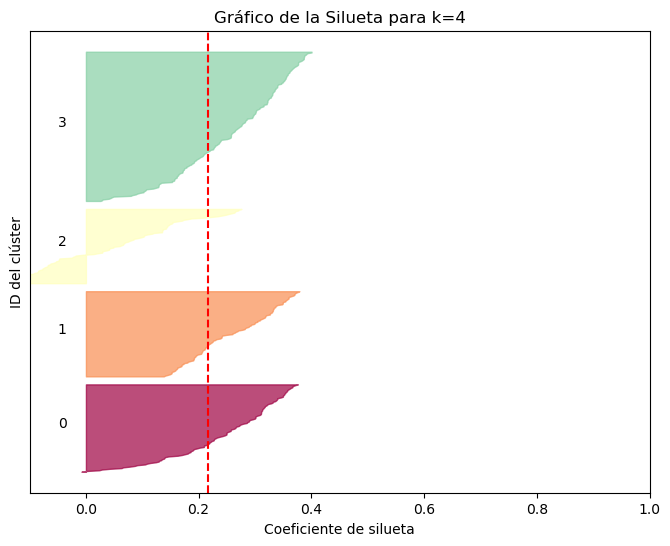

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


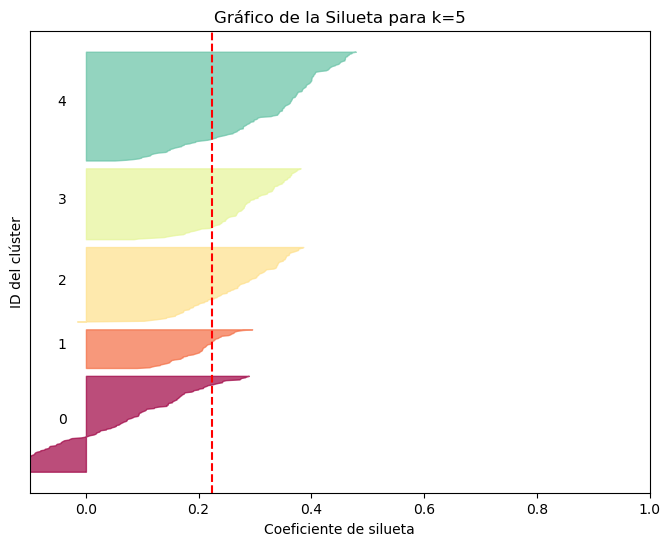

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


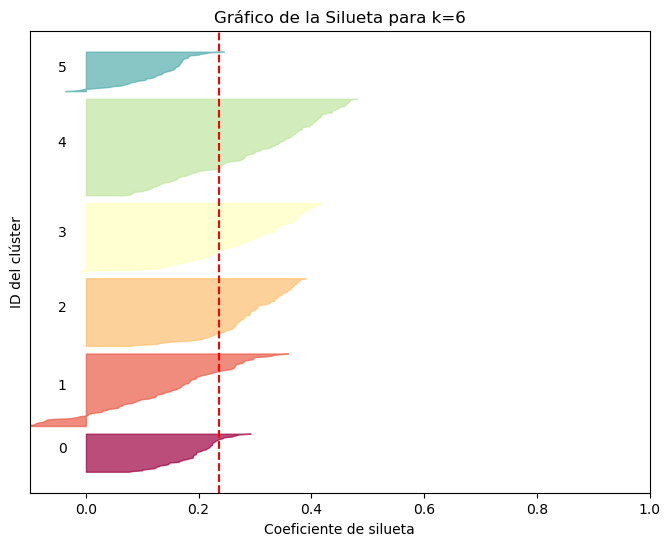

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


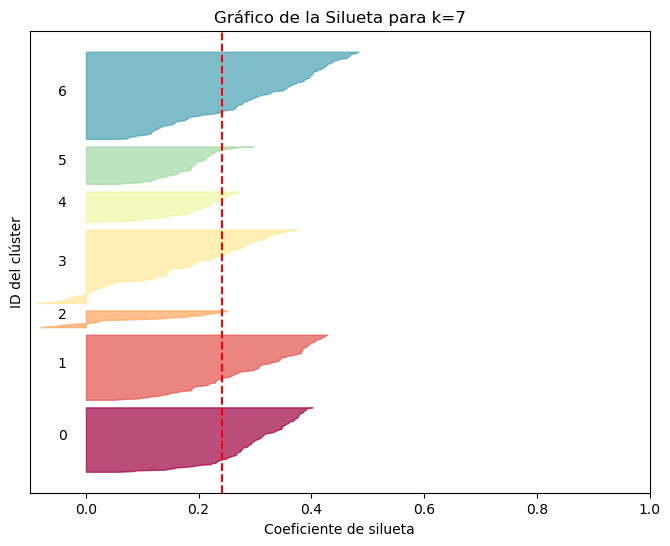

Mejores k según el método de la silueta: [7 6 5 4 2 3]
Coeficientes de silueta correspondientes: [0.24112454 0.23644543 0.22413226 0.21725255 0.19328418 0.18278202]


In [71]:
# Aplicar el método de la silueta
mejores_k, coeficientes_silueta = metodo_silueta(df_academico, max_k=7)
print("Mejores k según el método de la silueta:", mejores_k)
print("Coeficientes de silueta correspondientes:", coeficientes_silueta)

Recordemos que con el método del codo se observaban codos con el df_academico en 2, 4, 6, siendo el más evidente k=2.

Dentro de los candidatos que tenemos con el método del codo, los que mejor valorados por el método de la silueta son k = 7 y después k = 4, pero como k=4 (0.19810376) y k=2 (0.19136374) tienen un coeficiente tan similar y k = 2 era bastante más evidente en el método del codo, son k=6 y k=2 los que pasan al último criterio de selección

### Criterio de Calinski-Harabasz 

### Criterio de Calinski-Harabasz

El criterio de Calinski-Harabasz, también conocido como el índice de Calinski-Harabasz o el criterio de varianza de razón, es una métrica utilizada para evaluar la calidad de los clústeres formados por un algoritmo de clustering. Este índice mide la relación entre la dispersión dentro de los clústeres y la dispersión entre los clústeres.

#### Interpretación del Índice de Calinski-Harabasz

- **Valores Altos**: Un valor alto del índice de Calinski-Harabasz indica que los clústeres están bien separados y son compactos, lo que sugiere una buena calidad de clustering.
- **Valores Bajos**: Un valor bajo del índice de Calinski-Harabasz indica que los clústeres no están bien separados y/o no son compactos, lo que sugiere una mala calidad de clustering.

### Implementación del Método de Calinski-Harabasz

A continuación, se presenta una función en Python que aplica el criterio de Calinski-Harabasz para determinar el número óptimo de clústeres en un modelo KMeans. La función también genera un gráfico que muestra el coeficiente de Calinski-Harabasz para cada valor de `k`.



In [72]:
from sklearn.metrics import calinski_harabasz_score

def metodo_calinski_harabasz(df, max_k=10):
    """Aplica el criterio de Calinski-Harabasz para determinar el número de clusters óptimo en un modelo KMeans.

    Args:
        df (DataFrame): dataframe con los datos a clusterizar.
        max_k (int): número máximo de clusters a considerar, por defecto k=10.

    Returns:
        mejores_k (list): lista con los mejores clústeres ordenados por el coeficiente de Calinski-Harabasz de mejor a peor.
    """
    coeficientes_calinski_harabasz = [] # Lista para almacenar los coeficientes de Calinski-Harabasz

    for k in range(2, max_k + 1): # Iterar sobre el rango de k, desde 2 hasta max_k porque no tiene sentido un cluster
        kmeans = KMeans(n_clusters=k, random_state=42) # Inicializar el modelo KMeans
        cluster_labels = kmeans.fit_predict(df) # Ajustar el modelo y predecir los clusters
        calinski_harabasz_avg = calinski_harabasz_score(df, cluster_labels) # Calcular el coeficiente de Calinski-Harabasz promedio para k clusters
        coeficientes_calinski_harabasz.append(calinski_harabasz_avg) # Agregar el coeficiente a la lista

    # Graficar el coeficiente de Calinski-Harabasz para cada k
    plt.figure(figsize=(8, 6))
    plt.bar(range(2, max_k + 1), coeficientes_calinski_harabasz, color='blue')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Coeficiente de Calinski-Harabasz')
    plt.title('Criterio de Calinski-Harabasz')
    plt.show()

    # Ordenar los índices de mayor a menor
    mejores_k = np.argsort(coeficientes_calinski_harabasz)[::-1] + 2 # Ordenar los k de mejor a peor, y sumar 2 para compensar el rango, que empieza en 2, con mejor a peor es de
    return mejores_k, coeficientes_calinski_harabasz

#### Variables personales

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

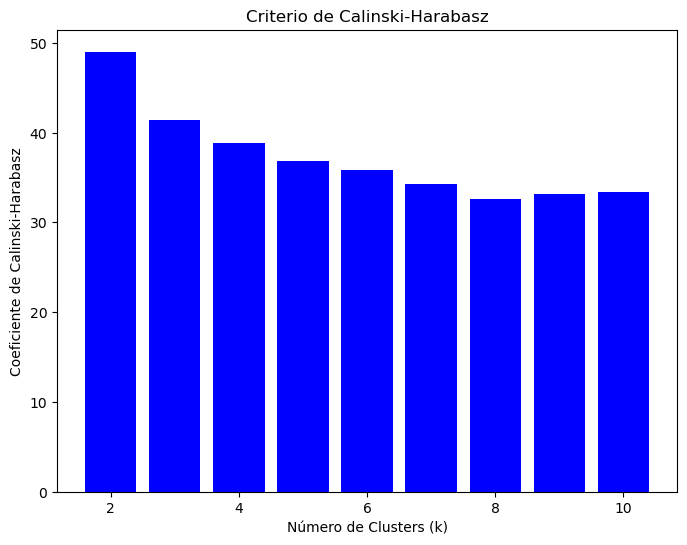

Mejores k según el criterio de Calinski-Harabasz: [ 2  3  4  5  6  7 10  9  8]
Coeficientes de Calinski-Harabasz correspondientes: [48.99806511453538, 41.37664708454084, 38.792782690259976, 36.82122082007799, 35.87532258326707, 34.30096790796857, 32.63796265923747, 33.190248007192686, 33.3742230369504]


In [73]:
# Aplicar el método de Calinski-Harabasz
mejores_k_ch, coeficientes_calinski_harabasz = metodo_calinski_harabasz(df_personal, max_k=10)
print("Mejores k según el criterio de Calinski-Harabasz:", mejores_k_ch)
print("Coeficientes de Calinski-Harabasz correspondientes:", coeficientes_calinski_harabasz)

Recordemos que en la rama de variables personales llegaban como canditados a esta última ronda de selección k=5 y k=4. Según el Criterio de Calinski-Harabasz, el mejor posicionado es k=4, por tener un coeficiente bastante más elevado. De todas formas, esto no es un resultado definitivo, y la selección final del número de clústers se determinará en base al rendimiento de los modelos.

#### Variables académicas

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

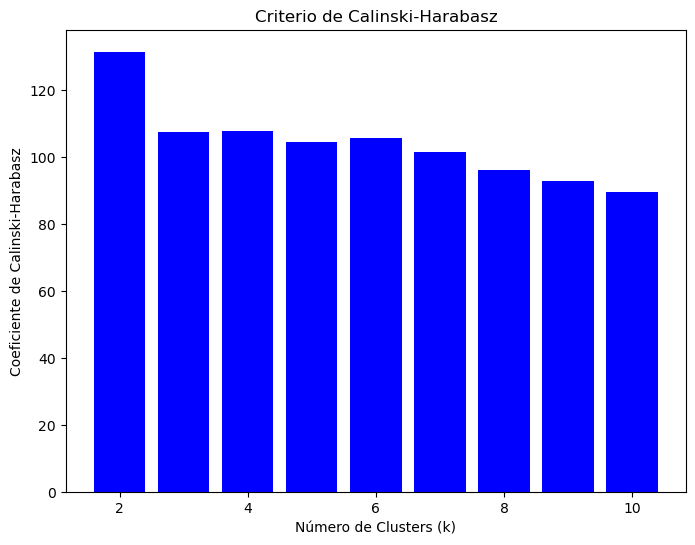

Mejores k según el criterio de Calinski-Harabasz: [ 2  4  3  6  5  7  8  9 10]
Coeficientes de Calinski-Harabasz correspondientes: [131.3895013113694, 107.55548883966873, 107.6281946509881, 104.42931524536587, 105.56996442934228, 101.34609093004556, 96.01230552352155, 92.92639025444576, 89.3716666263666]


In [74]:
# Aplicar el método de Calinski-Harabasz
mejores_k_ch, coeficientes_calinski_harabasz = metodo_calinski_harabasz(df_academico, max_k=10)
print("Mejores k según el criterio de Calinski-Harabasz:", mejores_k_ch)
print("Coeficientes de Calinski-Harabasz correspondientes:", coeficientes_calinski_harabasz)

Recordemos que en la rama de variables académicas llegaban como canditados a esta última ronda de selección k=2 y k=7. Según el Criterio de Calinski-Harabasz, el mejor posicionado es k=2, por tener un coeficiente bastante más elevado. De todas formas, esto no es un resultado definitivo, y la selección final del número de clústers se determinará en base al rendimiento de los modelos.

### Aplicamos k-means según los resultados anteriores al df_personal

#### Para K=2

In [75]:
# k-means, con k=2 para el dataset personal
kmeans_personal_2 = KMeans(n_clusters=2, random_state=5).fit(df_personal)
# Añadir la columna cluster al dataset personal
df_personal['cluster_2'] = kmeans_personal_2.labels_


c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


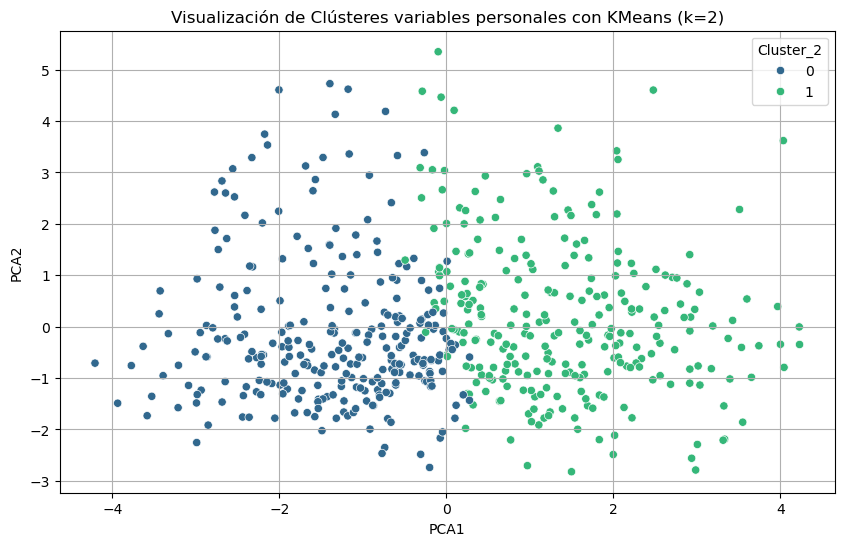

In [76]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca_2 = PCA(n_components=2)
df_personal_pca_2 = pca_2.fit_transform(df_personal.drop(columns=['cluster_2']))

# Convertir el resultado a un DataFrame
df_personal_pca_2 = pd.DataFrame(df_personal_pca_2, columns=['PCA1', 'PCA2'])
df_personal_pca_2['cluster_2'] = df_personal['cluster_2']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_personal_pca_2, x='PCA1', y='PCA2', hue='cluster_2', palette='viridis')
plt.title('Visualización de Clústeres variables personales con KMeans (k=2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster_2')
plt.grid(True)

plt.show()



c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


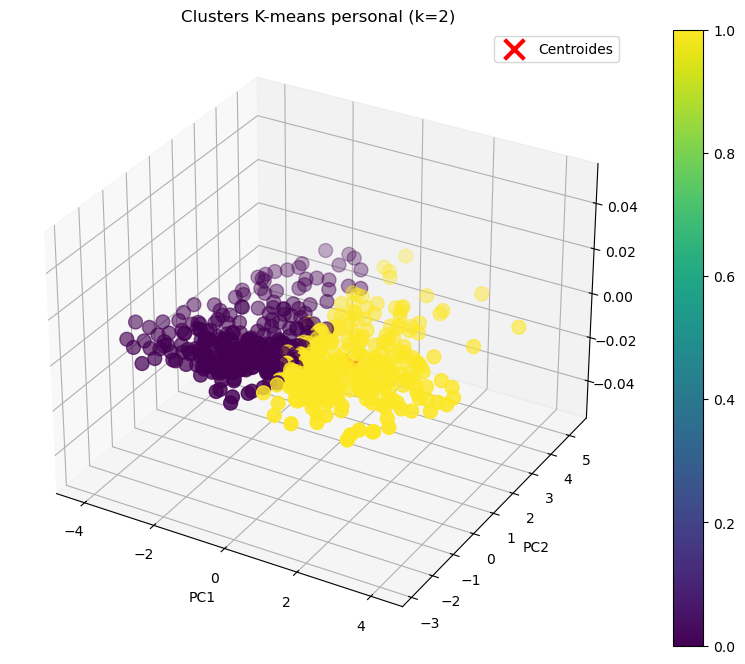

In [77]:
# Visualización 3D

# Escalar los datos

X_scaled = df_personal.drop(columns=['cluster_2'])

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_2 = pca.transform(kmeans_personal_2.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeans_personal_2.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_2[:, 0], centroides_pca_2[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means personal (k=2)')

plt.show()

#### Para k=5

In [78]:
# k-means, con k=6 para el dataset personal
kmeans_personal_5 = KMeans(n_clusters=5, random_state=5).fit(df_personal)
# Añadir la columna cluster al dataset personal
df_personal['cluster_5'] = kmeans_personal_5.labels_

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


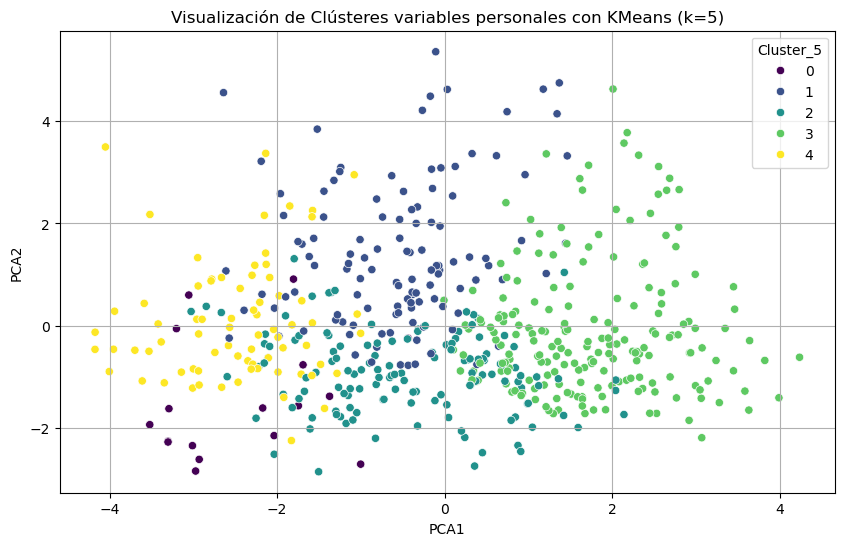

In [79]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca_2 = PCA(n_components=2)
df_personal_pca_5 = pca_2.fit_transform(df_personal.drop(columns=['cluster_5']))

# Convertir el resultado a un DataFrame
df_personal_pca_5 = pd.DataFrame(df_personal_pca_5, columns=['PCA1', 'PCA2'])
df_personal_pca_5['cluster_5'] = df_personal['cluster_5']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_personal_pca_5, x='PCA1', y='PCA2', hue='cluster_5', palette='viridis')
plt.title('Visualización de Clústeres variables personales con KMeans (k=5)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster_5')
plt.grid(True)

plt.show()



c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


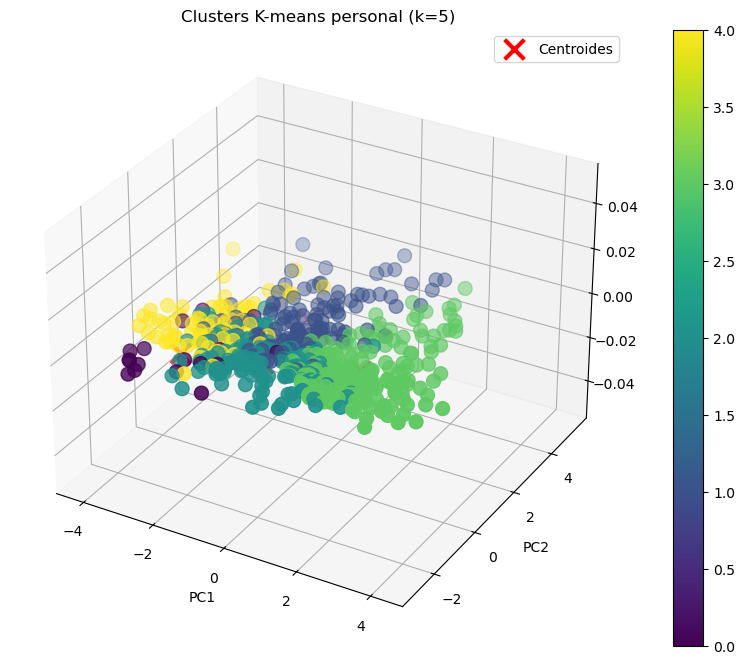

In [80]:
# Visualización 3D
X_scaled = df_personal.drop(columns=['cluster_5'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_5 = pca.transform(kmeans_personal_5.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeans_personal_5.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_5[:, 0], centroides_pca_5[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means personal (k=5)')

plt.show()

#### Para k=3

In [81]:
# k-means, con k=3 para el dataset personal
kmeans_personal_3 = KMeans(n_clusters=3, random_state=5).fit(df_personal)
# Añadir la columna cluster al dataset personal
df_personal['cluster_3'] = kmeans_personal_3.labels_

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


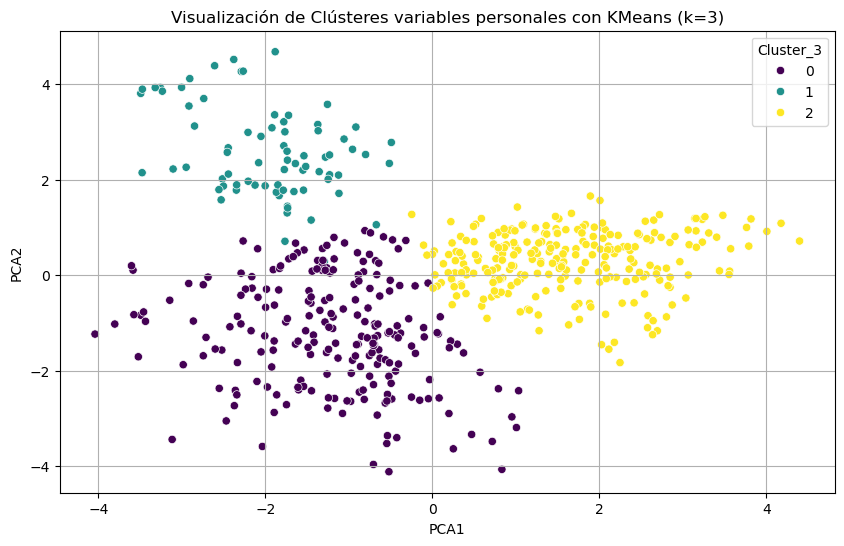

In [82]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca_2 = PCA(n_components=2)
df_personal_pca_3 = pca_2.fit_transform(df_personal.drop(columns=['cluster_3']))

# Convertir el resultado a un DataFrame
df_personal_pca_3 = pd.DataFrame(df_personal_pca_3, columns=['PCA1', 'PCA2'])
df_personal_pca_3['cluster_3'] = df_personal['cluster_3']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_personal_pca_3, x='PCA1', y='PCA2', hue='cluster_3', palette='viridis')
plt.title('Visualización de Clústeres variables personales con KMeans (k=3)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster_3')
plt.grid(True)

plt.show()



c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


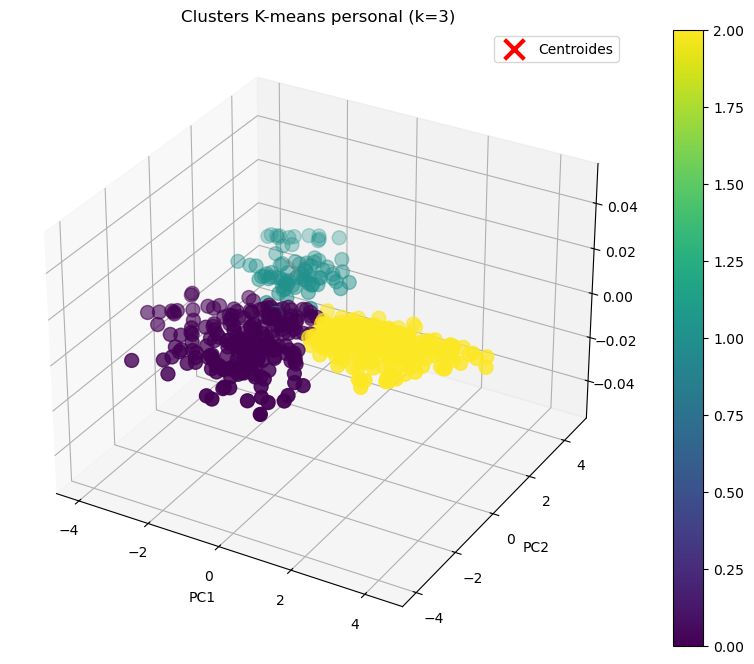

In [83]:
# Visualización 3D
X_scaled = df_personal.drop(columns=['cluster_3'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_3 = pca.transform(kmeans_personal_3.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeans_personal_3.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_3[:, 0], centroides_pca_3[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means personal (k=3)')

plt.show()

### Aplicamos k-means según los resultados anteriores al df_academico

#### Para k=2

In [84]:
# k-means, con k=2 para el dataset académico
kmeans_academico_2 = KMeans(n_clusters=2, random_state=5).fit(df_academico)
# Añadir la columna cluster al dataset personal
df_academico['cluster_2'] = kmeans_academico_2.labels_

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


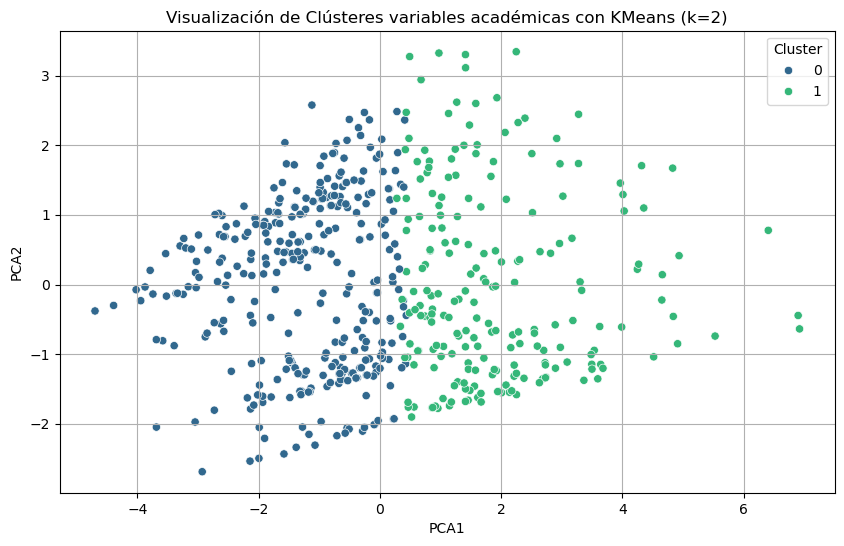

In [85]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca = PCA(n_components=2)
df_academico_pca_2 = pca.fit_transform(df_academico.drop(columns=['cluster_2']))

# Convertir el resultado a un DataFrame
df_academico_pca_2 = pd.DataFrame(df_academico_pca_2, columns=['PCA1', 'PCA2'])
df_academico_pca_2['cluster_2'] = df_academico['cluster_2']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_academico_pca_2, x='PCA1', y='PCA2', hue='cluster_2', palette='viridis')
plt.title('Visualización de Clústeres variables académicas con KMeans (k=2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


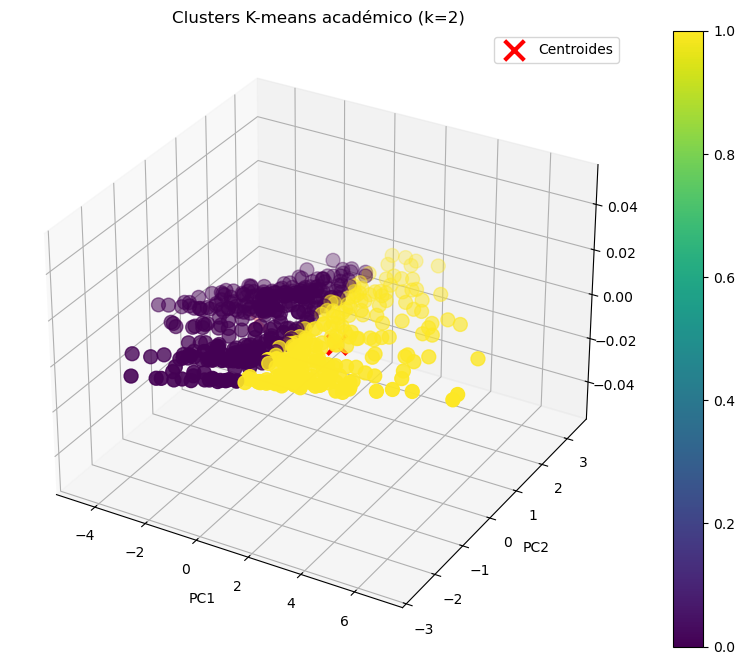

In [86]:
# Visualización 3D
X_scaled = df_academico.drop(columns=['cluster_2'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_2 = pca.transform(kmeans_academico_2.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeans_academico_2.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_2[:, 0], centroides_pca_2[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means académico (k=2)')
plt.show()

#### Para K=6

In [87]:
# k-means, con k=6 para el dataset personal
kmeans_academico_6 = KMeans(n_clusters=6, random_state=5).fit(df_academico)
# Añadir la columna cluster al dataset personal
df_academico['cluster_6'] = kmeans_academico_6.labels_

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


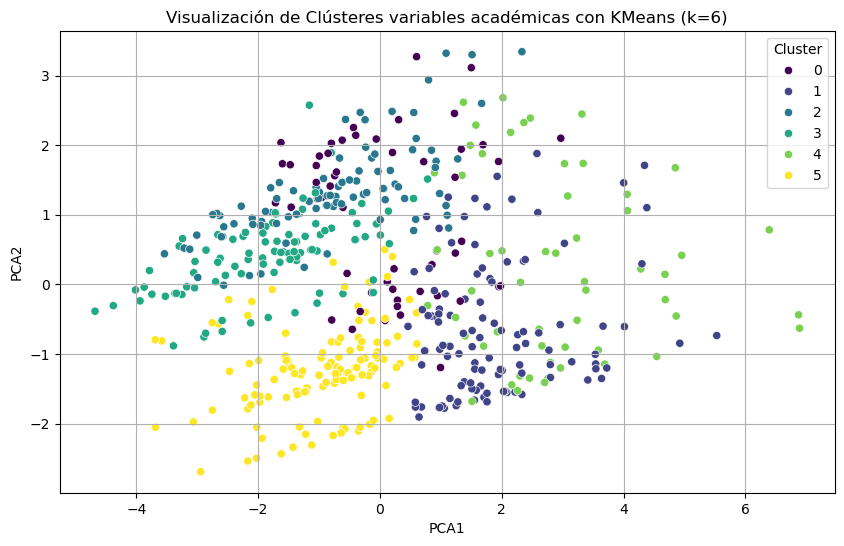

In [88]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca = PCA(n_components=2)
df_academico_pca_6 = pca.fit_transform(df_academico.drop(columns=['cluster_6']))

# Convertir el resultado a un DataFrame
df_academico_pca_6 = pd.DataFrame(df_academico_pca_6, columns=['PCA1', 'PCA2'])
df_academico_pca_6['cluster_6'] = df_academico['cluster_6']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_academico_pca_6, x='PCA1', y='PCA2', hue='cluster_6', palette='viridis')
plt.title('Visualización de Clústeres variables académicas con KMeans (k=6)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)

plt.show()



c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


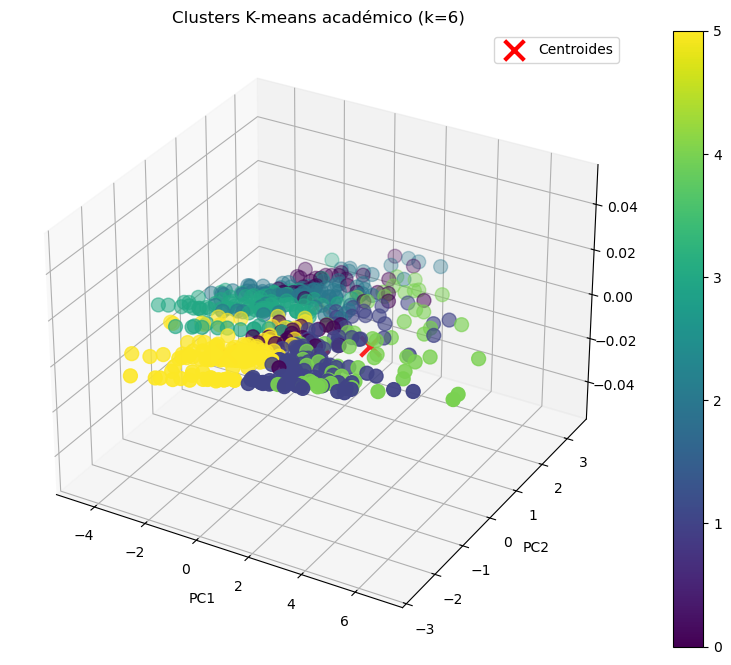

In [89]:
# Visualización 3D

X_scaled = df_academico.drop(columns=['cluster_6'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_6 = pca.transform(kmeans_academico_6.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeans_academico_6.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_6[:, 0], centroides_pca_6[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means académico (k=6)')
plt.show()

### Conclusiones tras k-means

Tras probar con diferente número de clústers en ambos casos, concluímos que los mejores hasta el momento son k=3 para el caso con variables personales y k=2 para el caso con variables académicas.

### Probamos si mejora con k-means++

La principal diferencia entre KMeans y KMeans++ radica en el método de inicialización de los centroides. En KMeans, los centroides iniciales se seleccionan de manera aleatoria, lo que puede llevar a resultados subóptimos y a una mayor variabilidad en las soluciones obtenidas. Por otro lado, KMeans++ mejora este proceso seleccionando los centroides iniciales de manera más inteligente: el primer centroide se elige aleatoriamente, y los siguientes se seleccionan con una probabilidad proporcional a su distancia al centroide más cercano ya seleccionado. Esta estrategia de inicialización reduce significativamente la probabilidad de converger a soluciones subóptimas y mejora la velocidad de convergencia del algoritmo.

#### Para df_personal k=2

In [90]:
# Kmeans con k=2 para el dataframe personal con inicialización de los centroides con kmeans++
kmeanspp_personal_2 = KMeans(n_clusters=2, random_state=5, init='k-means++').fit(df_personal)

# Añadir la columna cluster al dataset personal
df_personal['cluster_2pp'] = kmeanspp_personal_2.labels_


c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


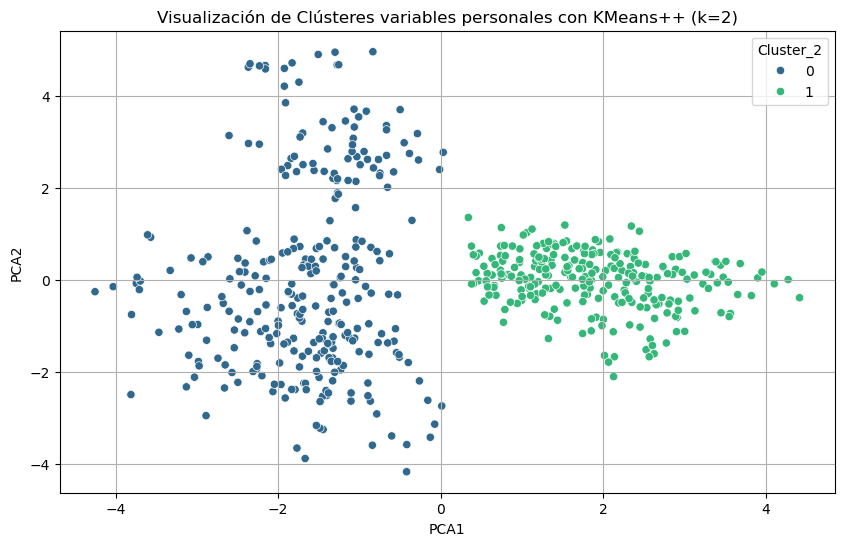

In [91]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca_2 = PCA(n_components=2)
df_personal_pca_2pp = pca_2.fit_transform(df_personal.drop(columns=['cluster_2pp']))

# Convertir el resultado a un DataFrame
df_personal_pca_2pp = pd.DataFrame(df_personal_pca_2pp, columns=['PCA1', 'PCA2'])
df_personal_pca_2pp['cluster_2pp'] = df_personal['cluster_2pp']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_personal_pca_2pp, x='PCA1', y='PCA2', hue='cluster_2pp', palette='viridis') # hue es la variable que se va a representar con colores y palette es la paleta de colores
plt.title('Visualización de Clústeres variables personales con KMeans++ (k=2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster_2')
plt.grid(True)

plt.show()



c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


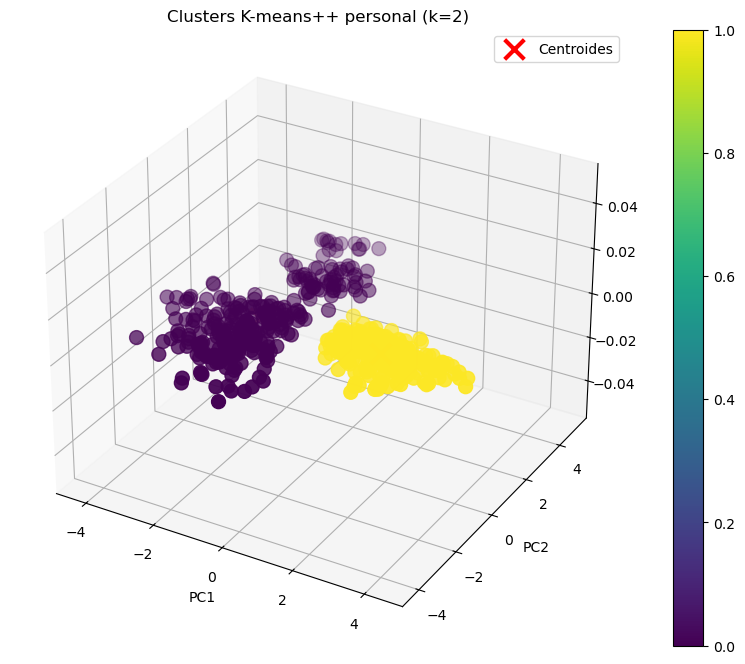

In [92]:
# Visualización 3D

X_scaled = df_personal.drop(columns=['cluster_2pp'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_2pp = pca.transform(kmeanspp_personal_2.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeanspp_personal_2.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_2pp[:, 0], centroides_pca_2pp[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means++ personal (k=2)')

plt.show()

#### Para df_personal k=3

In [93]:
# Kmeans con k=3 para el dataframe personal con inicialización de los centroides con kmeans++
kmeanspp_personal_3 = KMeans(n_clusters=3, random_state=5, init='k-means++').fit(df_personal)

# Añadir la columna cluster al dataset personal
df_personal['cluster_3pp'] = kmeanspp_personal_3.labels_


c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


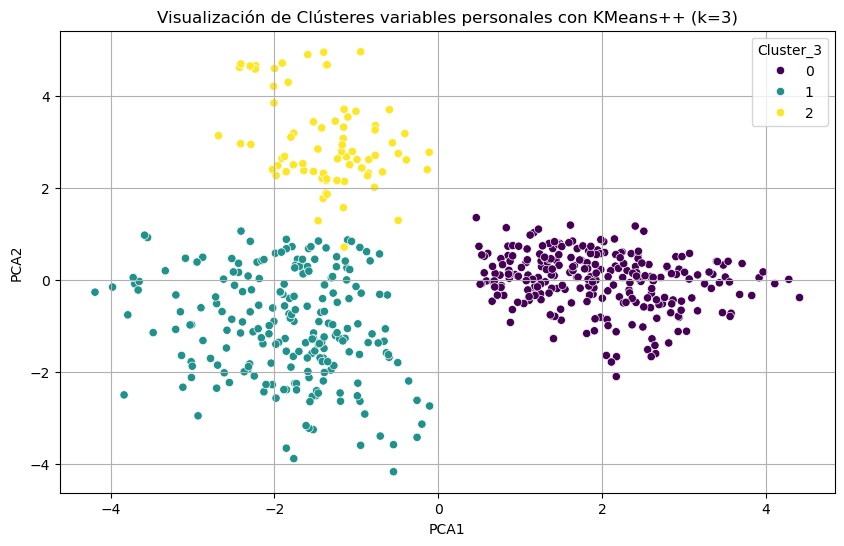

In [94]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca_2 = PCA(n_components=2)
df_personal_pca_3pp = pca_2.fit_transform(df_personal.drop(columns=['cluster_3pp']))

# Convertir el resultado a un DataFrame
df_personal_pca_3pp = pd.DataFrame(df_personal_pca_3pp, columns=['PCA1', 'PCA2'])
df_personal_pca_3pp['cluster_3pp'] = df_personal['cluster_3pp']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_personal_pca_3pp, x='PCA1', y='PCA2', hue='cluster_3pp', palette='viridis')
plt.title('Visualización de Clústeres variables personales con KMeans++ (k=3)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster_3')
plt.grid(True)

plt.show()



c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


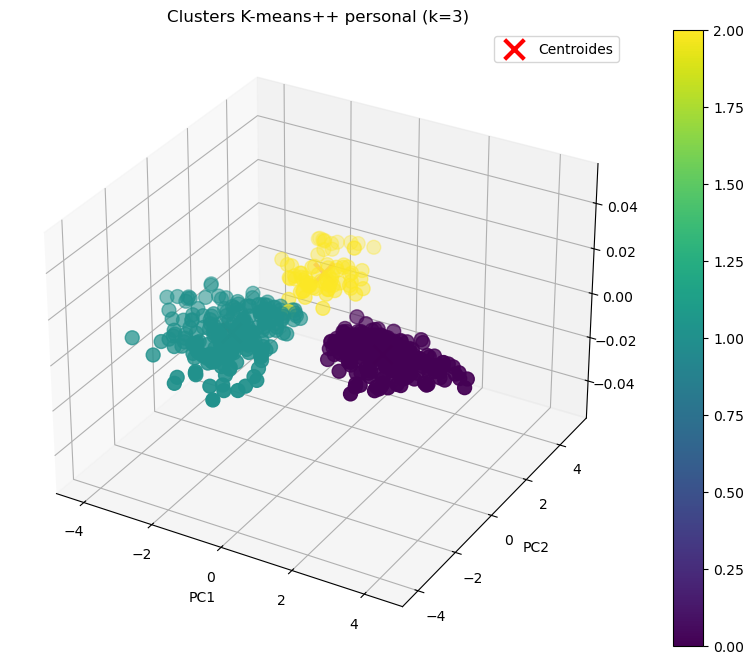

In [95]:
# Visualización 3D

X_scaled = df_personal.drop(columns=['cluster_3pp'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_3pp = pca.transform(kmeanspp_personal_3.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeanspp_personal_3.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_3pp[:, 0], centroides_pca_3pp[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means++ personal (k=3)')

plt.show()

#### Para df_academico k=2

In [96]:
# Kmeans con k=3 para el dataframe personal con inicialización de los centroides con kmeans++
kmeanspp_academico_2 = KMeans(n_clusters=2, random_state=5, init='k-means++').fit(df_academico)

# Añadir la columna cluster al dataset personal
df_academico['cluster_2pp'] = kmeanspp_academico_2.labels_


c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


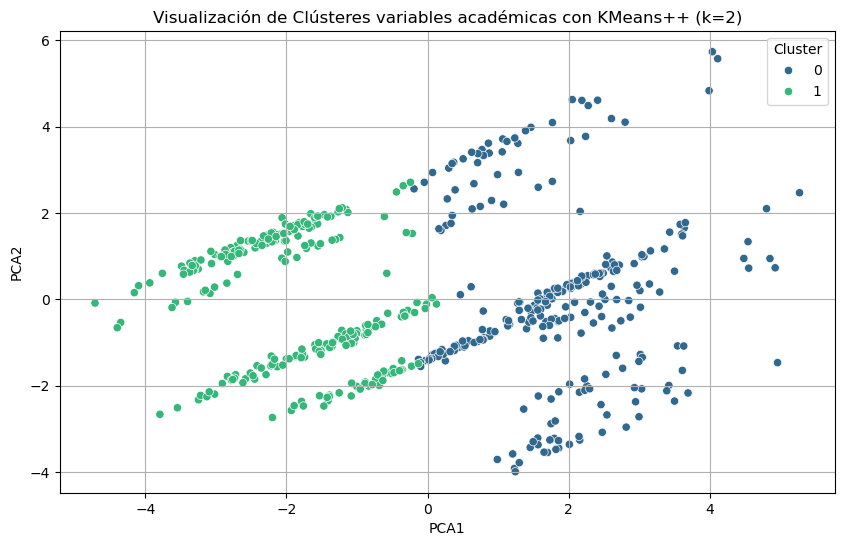

In [97]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca = PCA(n_components=2)
df_academico_pca_2pp = pca.fit_transform(df_academico.drop(columns=['cluster_2pp']))

# Convertir el resultado a un DataFrame
df_academico_pca_2pp = pd.DataFrame(df_academico_pca_2pp, columns=['PCA1', 'PCA2'])
df_academico_pca_2pp['cluster_2pp'] = df_academico['cluster_2pp']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_academico_pca_2pp, x='PCA1', y='PCA2', hue='cluster_2pp', palette='viridis')
plt.title('Visualización de Clústeres variables académicas con KMeans++ (k=2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


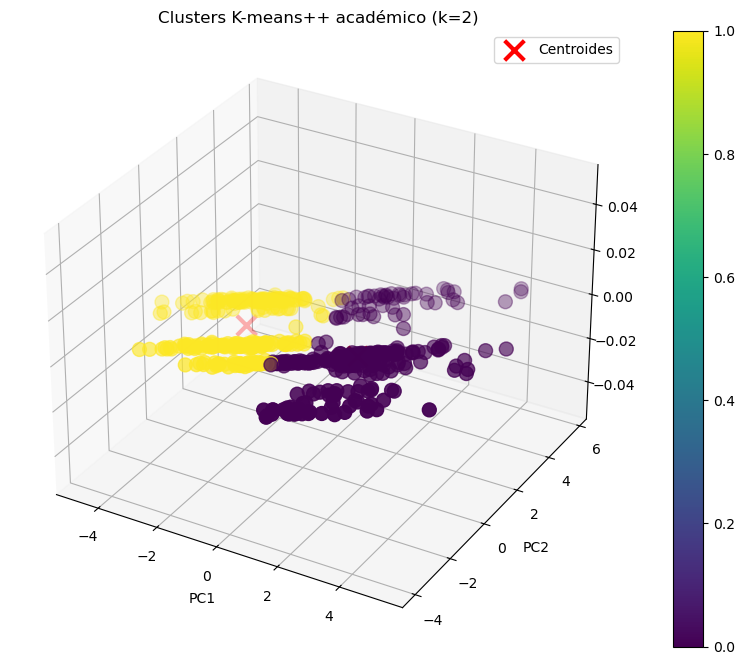

In [98]:
# Visualización 3D

X_scaled = df_academico.drop(columns=['cluster_2pp'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_2pp = pca.transform(kmeanspp_academico_2.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeanspp_academico_2.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_2pp[:, 0], centroides_pca_2pp[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means++ académico (k=2)')
plt.show()

Ahora, en este caso se ve a nivel visual se observa que k=5 o k=4 podrían funcionar para este caso, por lo que probamos con ambas.

#### Para df_academico k=5

In [99]:
# Kmeans con k=5 para el dataframe personal con inicialización de los centroides con kmeans++
kmeanspp_academico_5 = KMeans(n_clusters=5, random_state=5, init='k-means++').fit(df_academico)

# Añadir la columna cluster al dataset personal
df_academico['cluster_5pp'] = kmeanspp_academico_5.labels_


c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


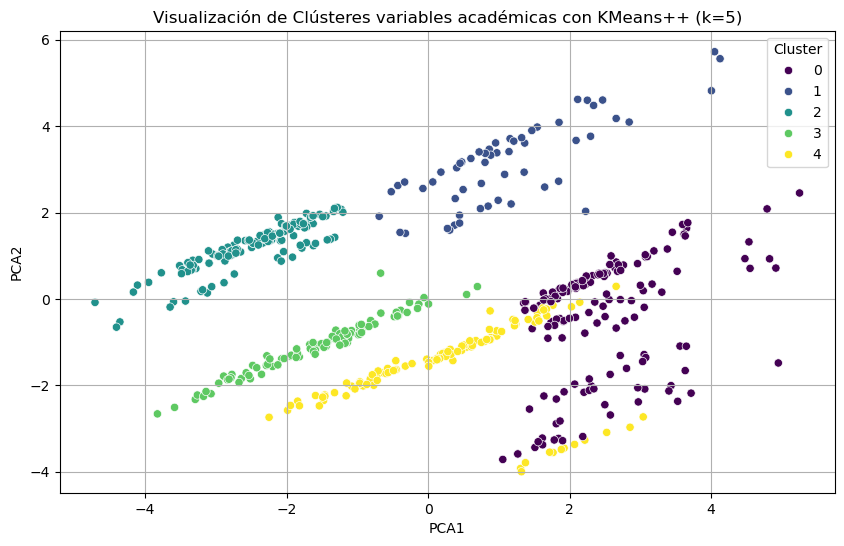

In [100]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca = PCA(n_components=2)
df_academico_pca_5pp = pca.fit_transform(df_academico.drop(columns=['cluster_5pp']))

# Convertir el resultado a un DataFrame
df_academico_pca_5pp = pd.DataFrame(df_academico_pca_5pp, columns=['PCA1', 'PCA2'])
df_academico_pca_5pp['cluster_5pp'] = df_academico['cluster_5pp']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_academico_pca_5pp, x='PCA1', y='PCA2', hue='cluster_5pp', palette='viridis')
plt.title('Visualización de Clústeres variables académicas con KMeans++ (k=5)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


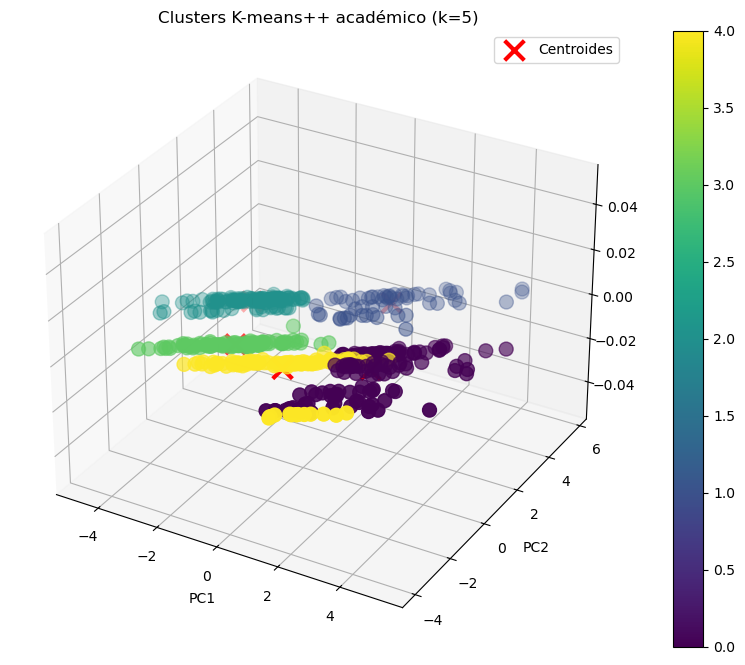

In [101]:
# Visualización 3D
X_scaled = df_academico.drop(columns=['cluster_5pp'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_5pp = pca.transform(kmeanspp_academico_5.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeanspp_academico_5.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_5pp[:, 0], centroides_pca_5pp[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means++ académico (k=5)')
plt.show()

#### Para df_academico k=4

In [102]:
# Kmeans con k=4 para el dataframe personal con inicialización de los centroides con kmeans++
kmeanspp_academico_4 = KMeans(n_clusters=4, random_state=5, init='k-means++').fit(df_academico)

# Añadir la columna cluster al dataset personal
df_academico['cluster_4pp'] = kmeanspp_academico_4.labels_


c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


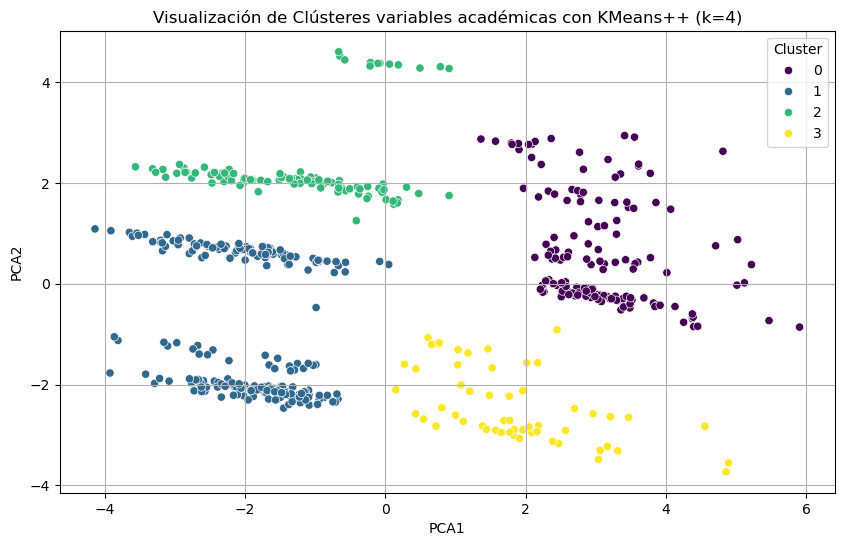

In [103]:
# Representación gráfica de los clusters

# Reducir las dimensiones a dos usando PCA
pca = PCA(n_components=2)
df_academico_pca_4pp = pca.fit_transform(df_academico.drop(columns=['cluster_4pp']))

# Convertir el resultado a un DataFrame
df_academico_pca_4pp = pd.DataFrame(df_academico_pca_4pp, columns=['PCA1', 'PCA2'])
df_academico_pca_4pp['cluster_4pp'] = df_academico['cluster_4pp']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_academico_pca_4pp, x='PCA1', y='PCA2', hue='cluster_4pp', palette='viridis')
plt.title('Visualización de Clústeres variables académicas con KMeans++ (k=4)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


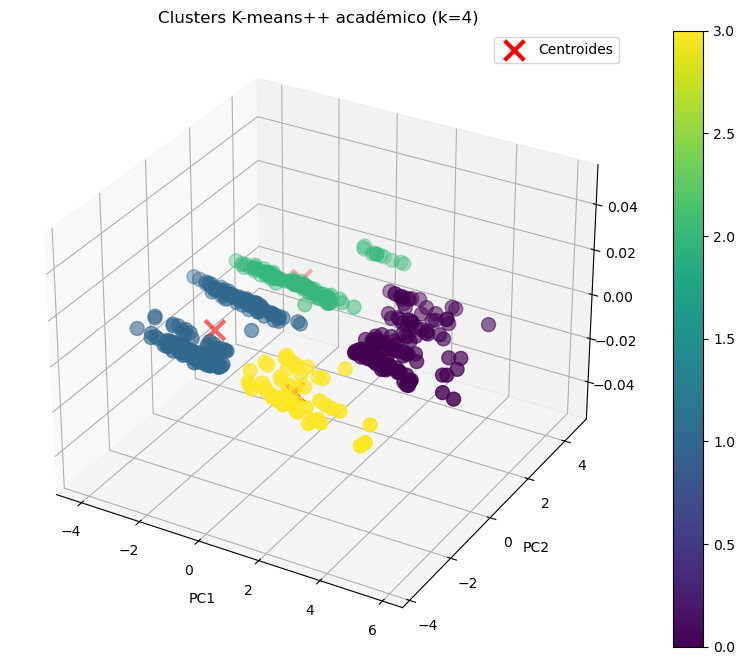

In [104]:
# Visualización 3D

X_scaled = df_academico.drop(columns=['cluster_4pp'])

# Aplicar PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
centroides_pca_4pp = pca.transform(kmeanspp_academico_4.cluster_centers_)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], 
                    c=kmeanspp_academico_4.labels_, cmap='viridis', s=100)
ax.scatter(centroides_pca_4pp[:, 0], centroides_pca_4pp[:, 1],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()
plt.title('Clusters K-means++ académico (k=4)')
plt.show()

### DBSCAN

#### Para df_personal

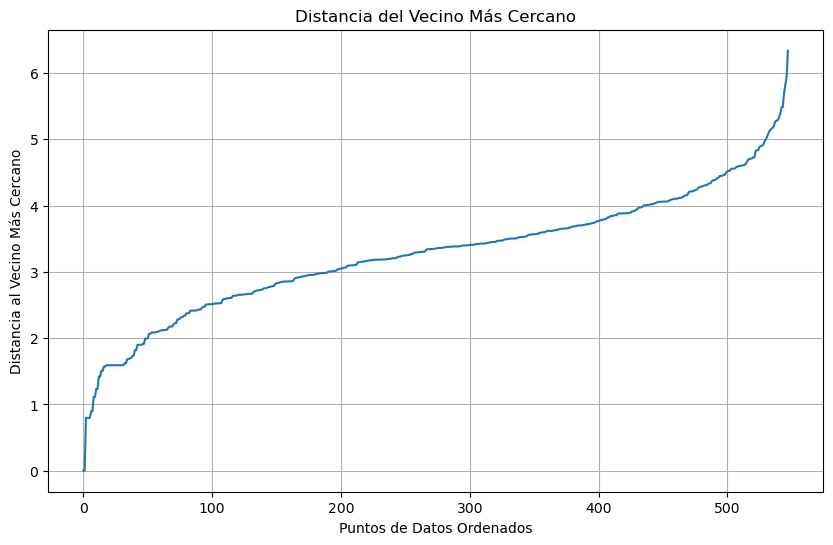

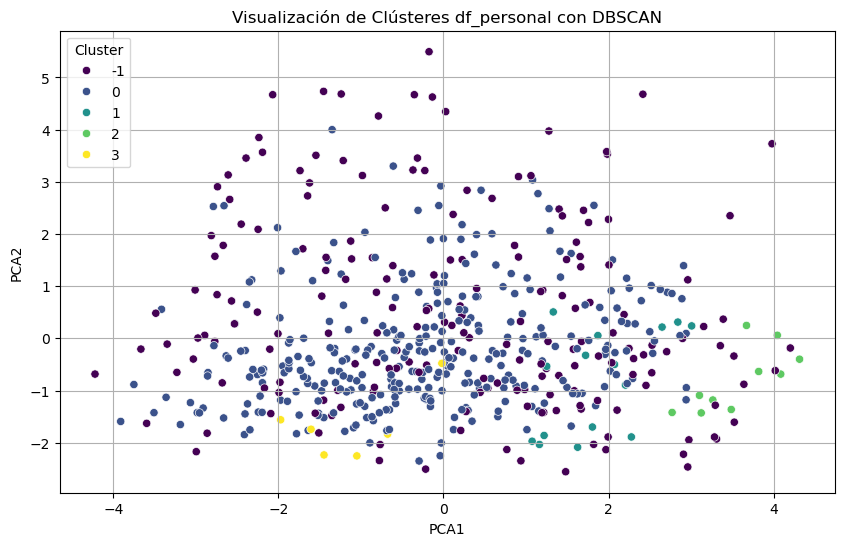

In [105]:
from sklearn.neighbors import NearestNeighbors

# Cargar el dataset
df_personal_dbscan = pd.read_csv('DF4.1_proy_escuela_eda_clusterizacion_personales.csv')

X_scaled = df_personal_dbscan

# Calcular las distancias de los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Graficar las distancias
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Distancia del Vecino Más Cercano')
plt.xlabel('Puntos de Datos Ordenados')
plt.ylabel('Distancia al Vecino Más Cercano')
plt.grid(True)
plt.show()


# Aplicar DBSCAN con parámetros ajustados
dbscan = DBSCAN(eps=4, min_samples=6)
clusters = dbscan.fit_predict(X_scaled)

# Añadir la columna de clusters al dataframe
df_personal_dbscan['dbscan_personal_cluster'] = clusters

# Visualización de los clusters
pca = PCA(n_components=2)
df_personal_pca = pca.fit_transform(X_scaled)
df_personal_pca = pd.DataFrame(df_personal_pca, columns=['PCA1', 'PCA2'])
df_personal_pca['dbscan_personal_cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_personal_pca, x='PCA1', y='PCA2', hue='dbscan_personal_cluster', palette='viridis')
plt.title('Visualización de Clústeres df_personal con DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

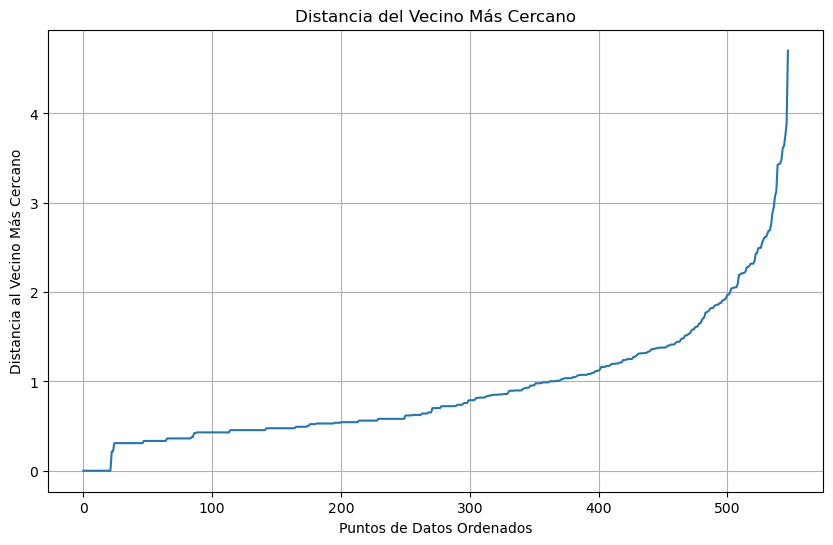

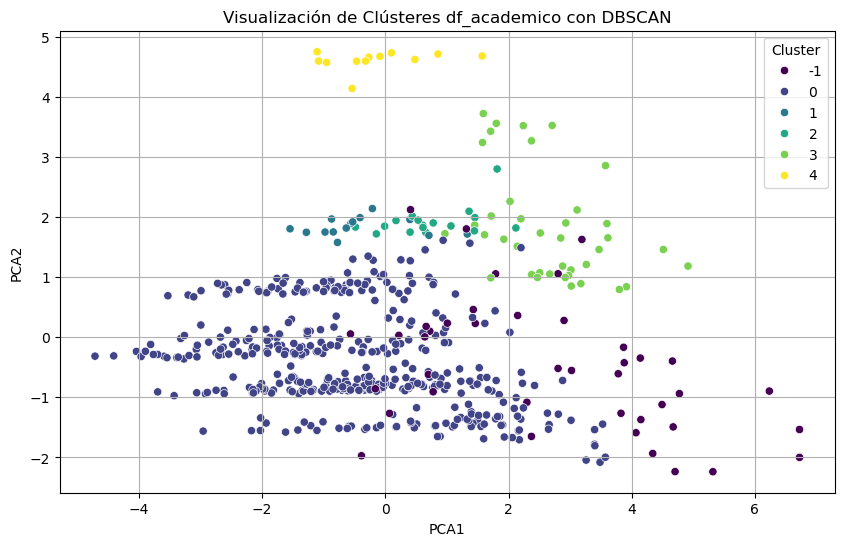

In [106]:
from sklearn.neighbors import NearestNeighbors

# Cargar el dataset
df_academicas_dbscan = pd.read_csv('DF4.2_proy_escuela_eda_clusterizacion_academicas.csv')

X_scaled = df_academicas_dbscan

# Calcular las distancias de los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Graficar las distancias
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Distancia del Vecino Más Cercano')
plt.xlabel('Puntos de Datos Ordenados')
plt.ylabel('Distancia al Vecino Más Cercano')
plt.grid(True)
plt.show()


# Aplicar DBSCAN con parámetros ajustados
dbscan = DBSCAN(eps=2.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Añadir la columna de clusters al dataframe
df_academicas_dbscan['dbscan_academico_cluster'] = clusters

# Visualización de los clusters
pca = PCA(n_components=2)
df_academico_pca = pca.fit_transform(X_scaled)
df_academico_pca = pd.DataFrame(df_academico_pca, columns=['PCA1', 'PCA2'])
df_academico_pca['dbscan_academico_cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_academico_pca, x='PCA1', y='PCA2', hue='dbscan_academico_cluster', palette='viridis')
plt.title('Visualización de Clústeres df_academico con DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Tras emplear DBSCAN, vemos que los resultados obtenidos son mucho peores que con K-means, sobretodo si los comparamos con los obtenidos con kmeans++. Los modelos que mejor han funcionado, como se puede observar en las gráficas generadas son: Kmeans++ con k=2 para las variables personales y Kmeans++ con k=4 para las variables académicas. Estos valores de k aparecían como candidatos tras emplear los métodos de codo y silueta. Tras concluir la selección del modelo, pasamos a la siguiente fase, debemos estudiar en profundidad los cluster obtenidos para poder comprender que hay detrás de esta división y que conclusiones podemos obtener.

### Persistimos los mejores modelos

In [107]:
#persistimos los mejores modelos obtenidos hasta el momento, kmeans++ con k=2 para df_personal y k=4 para df_academico
joblib.dump(kmeanspp_personal_2, 'P3.1_clusterizacion_kmeanspp_personal_k2.pkl')
joblib.dump(kmeanspp_academico_4, 'P3.2_clusterizacion_kmeanspp_academico_k4.pkl')

['P3.2_clusterizacion_kmeanspp_academico_k4.pkl']

#### Borramos las otras columnas de clúster y nos quedamos solo con las del modelo elegido

In [108]:
# Para df_personal, nos quedamos solo con la columna 'cluster_2pp'
df_personal = df_personal[['sexo', 'edad', 'familia_numerosa', 'independizado_padres', 'educacion_madre', 'educacion_padre', 'internet_casa', 'apoyo_familiar', 'actividades', 'relacion_romantica', 'relacion_familiar', 'tiempo_libre', 'consumo_alcohol_entre_semana', 'consumo_alcohol_fin_de_semana', 'salud', 'entorno_urbano', 'madre_casa', 'madre_prof', 'madre_salud', 'madre_serv', 'padre_casa', 'padre_prof', 'padre_salud', 'padre_serv', 'tiempo_viaje', 'cluster_2pp']]

# Para df_academico, nos quedamos solo con la columna 'cluster_4pp'
df_academico = df_academico[['interes_educacion_superior', 'tiempo_estudio', 'apoyo_escolar', 'suspensos', 'faltas', 'nota1', 'nota2', 'nota3', 'campus_coruna', 'razon_cerca', 'razon_curso', 'razon_rep', 'cluster_4pp']]


### Análisis estadístico de los clústeres de los modelos

In [109]:
# Analizamos la importancia de las variables en el modelo de clusterización
# Cargar los modelos
import joblib
import pandas as pd

kmeanspp_personal_2 = joblib.load('P3.1_clusterizacion_kmeanspp_personal_k2.pkl')
kmeanspp_academico_4 = joblib.load('P3.2_clusterizacion_kmeanspp_academico_k4.pkl')

# Cargar los datasets
df_personal = pd.read_csv('DF4.1_proy_escuela_eda_clusterizacion_personales.csv')
df_academico = pd.read_csv('DF4.2_proy_escuela_eda_clusterizacion_academicas.csv')

# Añadir las columnas de clusters a los dataframes
df_personal['cluster_2pp'] = kmeanspp_personal_2.labels_
df_academico['cluster_4pp'] = kmeanspp_academico_4.labels_

# Analizamos de que están compuestos los clusters

# Para df_personal
# Contar cuántos elementos hay en cada cluster
conteo_personal = df_personal['cluster_2pp'].value_counts().sort_index()
print(f'En df_personal, los clusters están compuestos por los siguientes elementos:\n{conteo_personal}')

# Para df_academico
# Contar cuántos elementos hay en cada cluster
conteo_academico = df_academico['cluster_4pp'].value_counts().sort_index()
print(f'En df_academico, los clusters están compuestos por los siguientes elementos:\n{conteo_academico}')

En df_personal, los clusters están compuestos por los siguientes elementos:
0    292
1    256
Name: cluster_2pp, dtype: int64
En df_academico, los clusters están compuestos por los siguientes elementos:
0    153
1    228
2    110
3     57
Name: cluster_4pp, dtype: int64


In [110]:
from IPython.display import display

# Análisis descriptivo para df_personal
for cluster in df_personal['cluster_2pp'].unique():
    print(f'\nAnálisis descriptivo para el clúster {cluster} en df_personal:')
    display(df_personal[df_personal['cluster_2pp'] == cluster].describe())

# Análisis descriptivo para df_academico
for cluster in df_academico['cluster_4pp'].unique():
    print(f'\nAnálisis descriptivo para el clúster {cluster} en df_academico:')
    display(df_academico[df_academico['cluster_4pp'] == cluster].describe())


Análisis descriptivo para el clúster 0 en df_personal:


sexo        edad  familia_numerosa  independizado_padres  \
count  292.000000  292.000000        292.000000            292.000000   
mean    -0.229732   -0.053765          0.032897             -0.049513   
std      1.015260    1.035585          1.016625              1.055593   
min     -1.189158   -1.424965         -0.633668             -2.656845   
25%     -1.189158   -0.628960         -0.633668              0.376386   
50%     -1.189158    0.167045         -0.633668              0.376386   
75%      0.840931    0.963050          1.578115              0.376386   
max      0.840931    4.147069          1.578115              0.376386   

       educacion_madre  educacion_padre  internet_casa  apoyo_familiar  \
count       292.000000       292.000000     292.000000      292.000000   
mean          0.625885         0.524615       0.358419        0.097899   
std           0.757319         0.912646       0.665457        0.972946   
min          -1.385325        -2.118045      -1.766437       -1.268670   
25%           0.405142        -0.287306       0.566111       -1.268670   
50%           0.405142         0.628064       0.566111        0.788227   
75%           1.300376         1.543434       0.566111        0.788227   
max           1.300376         1.543434       0.566111        0.788227   

       actividades  relacion_romantica  ...  madre_casa  madre_prof  \
count   292.000000          292.000000  ...  292.000000  292.000000   
mean      0.165773           -0.057923  ...   -0.464371    0.327207   
std       0.991538            0.984319  ...    0.322267    1.285764   
min      -0.978337           -0.767076  ...   -0.506834   -0.373220   
25%      -0.978337           -0.767076  ...   -0.506834   -0.373220   
50%       1.022143           -0.767076  ...   -0.506834   -0.373220   
75%       1.022143            1.303652  ...   -0.506834   -0.373220   
max       1.022143            1.303652  ...    1.973032    2.679385   

       madre_salud  madre_serv  padre_casa  padre_prof  padre_salud  \
count   292.000000  292.000000  292.000000  292.000000   292.000000   
mean      0.213964    0.396051   -0.159897    0.199856     0.156868   
std       1.280959    1.192989    0.651682    1.316521     1.352888   
min      -0.288104   -0.509676   -0.269086   -0.244870    -0.178928   
25%      -0.288104   -0.509676   -0.269086   -0.244870    -0.178928   
50%      -0.288104   -0.509676   -0.269086   -0.244870    -0.178928   
75%      -0.288104    1.962029   -0.269086   -0.244870    -0.178928   
max       3.470968    1.962029    3.716290    4.083800     5.588854   

       padre_serv  tiempo_viaje  cluster_2pp  
count  292.000000    292.000000        292.0  
mean     0.182407     -0.290295          0.0  
std      1.071627      0.832345          0.0  
min     -0.625190     -0.750471          0.0  
25%     -0.625190     -0.750471          0.0  
50%     -0.625190     -0.750471          0.0  
75%      1.599513      0.606817          0.0  
max      1.599513      3.321393          0.0  

[8 rows x 26 columns]


Análisis descriptivo para el clúster 1 en df_personal:


sexo        edad  familia_numerosa  independizado_padres  \
count  256.000000  256.000000        256.000000            256.000000   
mean     0.262038    0.061325         -0.037523              0.056475   
std      0.918358    0.958172          0.983326              0.933502   
min     -1.189158   -1.424965         -0.633668             -2.656845   
25%     -1.189158   -0.628960         -0.633668              0.376386   
50%      0.840931    0.167045         -0.633668              0.376386   
75%      0.840931    0.963050          1.578115              0.376386   
max      0.840931    3.351064          1.578115              0.376386   

       educacion_madre  educacion_padre  internet_casa  apoyo_familiar  \
count       256.000000       256.000000     256.000000      256.000000   
mean         -0.713900        -0.598389      -0.408821       -0.111665   
std           0.730955         0.723796       1.152725        1.022381   
min          -2.280559        -2.118045      -1.766437       -1.268670   
25%          -1.385325        -1.202676      -1.766437       -1.268670   
50%          -0.490091        -0.287306       0.566111        0.788227   
75%          -0.490091        -0.287306       0.566111        0.788227   
max           1.300376         1.543434       0.566111        0.788227   

       actividades  relacion_romantica  ...  madre_casa    madre_prof  \
count   256.000000          256.000000  ...  256.000000  2.560000e+02   
mean     -0.189085            0.066068  ...    0.529673 -3.732200e-01   
std       0.979649            1.017413  ...    1.225528  1.168018e-15   
min      -0.978337           -0.767076  ...   -0.506834 -3.732200e-01   
25%      -0.978337           -0.767076  ...   -0.506834 -3.732200e-01   
50%      -0.978337           -0.767076  ...   -0.506834 -3.732200e-01   
75%       1.022143            1.303652  ...    1.973032 -3.732200e-01   
max       1.022143            1.303652  ...    1.973032 -3.732200e-01   

       madre_salud  madre_serv  padre_casa  padre_prof   padre_salud  \
count   256.000000  256.000000  256.000000  256.000000  2.560000e+02   
mean     -0.244052   -0.451746    0.182383   -0.227961 -1.789275e-01   
std       0.405333    0.374673    1.265584    0.270542  1.390497e-16   
min      -0.288104   -0.509676   -0.269086   -0.244870 -1.789275e-01   
25%      -0.288104   -0.509676   -0.269086   -0.244870 -1.789275e-01   
50%      -0.288104   -0.509676   -0.269086   -0.244870 -1.789275e-01   
75%      -0.288104   -0.509676   -0.269086   -0.244870 -1.789275e-01   
max       3.470968    1.962029    3.716290    4.083800 -1.789275e-01   

       padre_serv  tiempo_viaje  cluster_2pp  
count  256.000000    256.000000        256.0  
mean    -0.208058      0.331118          1.0  
std      0.870030      1.073241          0.0  
min     -0.625190     -0.750471          1.0  
25%     -0.625190     -0.750471          1.0  
50%     -0.625190      0.606817          1.0  
75%     -0.625190      0.606817          1.0  
max      1.599513      3.321393          1.0  

[8 rows x 26 columns]


Análisis descriptivo para el clúster 2 en df_academico:


interes_educacion_superior  tiempo_estudio  apoyo_escolar   suspensos  \
count                1.100000e+02      110.000000     110.000000  110.000000   
mean                 3.473534e-01        0.070112       0.046407   -0.249065   
std                  3.345912e-16        0.920026       1.062308    0.417706   
min                  3.473534e-01       -1.130557      -0.340719   -0.357462   
25%                  3.473534e-01        0.070112      -0.340719   -0.357462   
50%                  3.473534e-01        0.070112      -0.340719   -0.357462   
75%                  3.473534e-01        0.070112      -0.340719   -0.357462   
max                  3.473534e-01        2.471451       2.934968    1.345922   

           faltas       nota1       nota2       nota3  campus_coruna  \
count  110.000000  110.000000  110.000000  110.000000     110.000000   
mean     0.146917    0.279933    0.268379    0.288516       0.380384   
std      1.244992    0.790048    0.741906    0.720727       0.769954   
min     -0.793246   -1.287754   -1.584498   -1.896177      -1.412280   
25%     -0.793246   -0.203191   -0.250184   -0.274506       0.708075   
50%     -0.364126    0.158330    0.083395    0.266051       0.708075   
75%      0.440475    0.881372    0.750552    0.883830       0.708075   
max      4.785317    2.327456    2.084866    2.119389       0.708075   

       razon_cerca   razon_curso   razon_rep  cluster_4pp  
count   110.000000  1.100000e+02  110.000000        110.0  
mean      1.789936 -8.632630e-01   -0.543607          2.0  
std       0.225348  1.338365e-15    0.000000          0.0  
min      -0.552052 -8.632630e-01   -0.543607          2.0  
25%       1.811422 -8.632630e-01   -0.543607          2.0  
50%       1.811422 -8.632630e-01   -0.543607          2.0  
75%       1.811422 -8.632630e-01   -0.543607          2.0  
max       1.811422 -8.632630e-01   -0.543607          2.0


Análisis descriptivo para el clúster 0 en df_academico:


interes_educacion_superior  tiempo_estudio  apoyo_escolar   suspensos  \
count                  153.000000      153.000000     153.000000  153.000000   
mean                     0.326267       -0.290873       0.579899    0.332798   
std                      0.260828        0.924767       1.477289    1.272866   
min                     -2.878912       -1.130557      -0.340719   -0.357462   
25%                      0.347353       -1.130557      -0.340719   -0.357462   
50%                      0.347353        0.070112      -0.340719   -0.357462   
75%                      0.347353        0.070112       2.934968    1.345922   
max                      0.347353        2.471451       2.934968    4.752689   

           faltas       nota1       nota2       nota3  campus_coruna  \
count  153.000000  153.000000  153.000000  153.000000     153.000000   
mean    -0.051401   -0.763194   -0.749462   -0.759544      -0.553051   
std      0.781781    0.668597    0.732159    0.829182       1.044378   
min     -0.793246   -2.372317   -3.919549   -3.749516      -1.412280   
25%     -0.793246   -1.287754   -0.917341   -0.969508      -1.412280   
50%     -0.364126   -0.564712   -0.583763   -0.660618      -1.412280   
75%      0.494115   -0.564712   -0.250184   -0.351728       0.708075   
max      3.068836    0.881372    0.750552    1.192720       0.708075   

       razon_cerca  razon_curso   razon_rep  cluster_4pp  
count   153.000000   153.000000  153.000000        153.0  
mean     -0.413025     0.352375   -0.154200          0.0  
std       0.557938     0.993114    0.884022          0.0  
min      -0.552052    -0.863263   -0.543607          0.0  
25%      -0.552052    -0.863263   -0.543607          0.0  
50%      -0.552052     1.158396   -0.543607          0.0  
75%      -0.552052     1.158396   -0.543607          0.0  
max       1.811422     1.158396    1.839565          0.0


Análisis descriptivo para el clúster 1 en df_academico:


interes_educacion_superior  tiempo_estudio  apoyo_escolar   suspensos  \
count                  228.000000      228.000000   2.280000e+02  228.000000   
mean                     0.333203        0.307086  -3.407193e-01   -0.327578   
std                      0.213665        1.014674   5.563329e-17    0.318369   
min                     -2.878912       -1.130557  -3.407193e-01   -0.357462   
25%                      0.347353        0.070112  -3.407193e-01   -0.357462   
50%                      0.347353        0.070112  -3.407193e-01   -0.357462   
75%                      0.347353        1.270781  -3.407193e-01   -0.357462   
max                      0.347353        2.471451  -3.407193e-01    3.049305   

           faltas       nota1       nota2       nota3  campus_coruna  \
count  228.000000  228.000000  228.000000  228.000000     228.000000   
mean    -0.155212    0.641944    0.626191    0.622358       0.270984   
std      0.873214    0.765961    0.737415    0.654011       0.859640   
min     -0.793246   -1.649275   -0.917341   -0.660618      -1.412280   
25%     -0.793246    0.158330    0.083395    0.266051       0.708075   
50%     -0.364126    0.519851    0.416973    0.574941       0.708075   
75%      0.064994    1.242893    1.084130    1.192720       0.708075   
max      6.072678    2.688977    2.752023    2.119389       0.708075   

       razon_cerca  razon_curso   razon_rep  cluster_4pp  
count   228.000000   228.000000  228.000000        228.0  
mean     -0.552052     0.112099    0.449382          1.0  
std       0.000000     1.012430    1.177505          0.0  
min      -0.552052    -0.863263   -0.543607          1.0  
25%      -0.552052    -0.863263   -0.543607          1.0  
50%      -0.552052    -0.863263   -0.543607          1.0  
75%      -0.552052     1.158396    1.839565          1.0  
max      -0.552052     1.158396    1.839565          1.0


Análisis descriptivo para el clúster 3 en df_academico:


interes_educacion_superior  tiempo_estudio  apoyo_escolar  suspensos  \
count                5.700000e+01       57.000000      57.000000  57.000000   
mean                -2.878912e+00       -0.582884      -0.283251   0.897663   
std                  1.344110e-15        0.820323       0.433875   1.719318   
min                 -2.878912e+00       -1.130557      -0.340719  -0.357462   
25%                 -2.878912e+00       -1.130557      -0.340719  -0.357462   
50%                 -2.878912e+00       -1.130557      -0.340719  -0.357462   
75%                 -2.878912e+00        0.070112      -0.340719   1.345922   
max                 -2.878912e+00        2.471451       2.934968   4.752689   

          faltas      nota1      nota2      nota3  campus_coruna  razon_cerca  \
count  57.000000  57.000000  57.000000  57.000000      57.000000    57.000000   
mean    0.475294  -1.059425  -1.010977  -1.007442      -0.333503    -0.137408   
std     1.281139   0.643204   0.861499   0.908228       1.069437     0.906919   
min    -0.793246  -2.733838  -3.919549  -3.749516      -1.412280    -0.552052   
25%    -0.793246  -1.287754  -1.250920  -1.278398      -1.412280    -0.552052   
50%     0.064994  -0.926233  -0.917341  -0.660618       0.708075    -0.552052   
75%     1.352355  -0.564712  -0.583763  -0.351728       0.708075    -0.552052   
max     4.785317   0.158330   0.416973   0.574941       0.708075     1.811422   

       razon_curso  razon_rep  cluster_4pp  
count    57.000000  57.000000         57.0  
mean      0.271703  -0.334557          3.0  
std       1.012095   0.680159          0.0  
min      -0.863263  -0.543607          3.0  
25%      -0.863263  -0.543607          3.0  
50%       1.158396  -0.543607          3.0  
75%       1.158396  -0.543607          3.0  
max       1.158396   1.839565          3.0

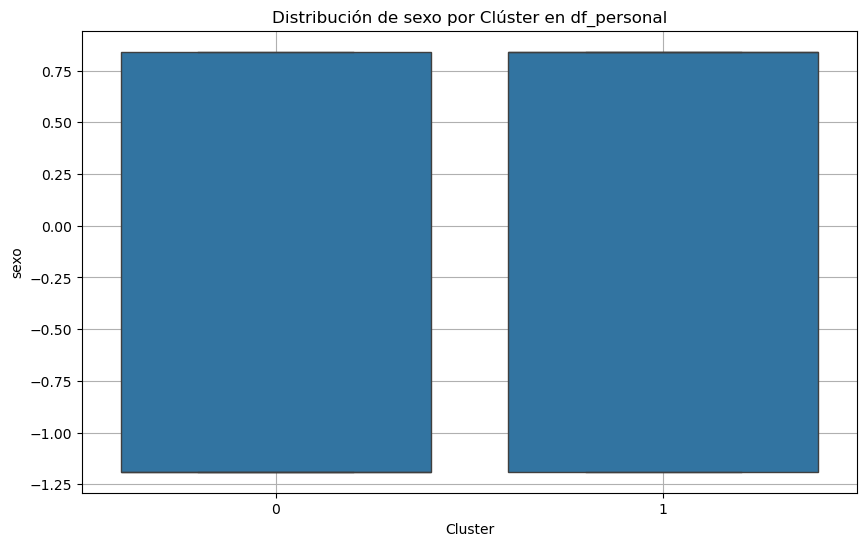

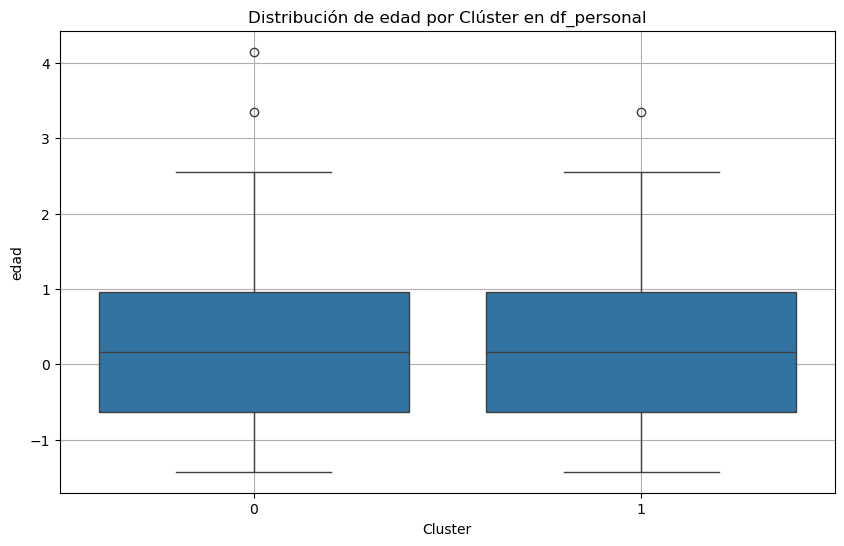

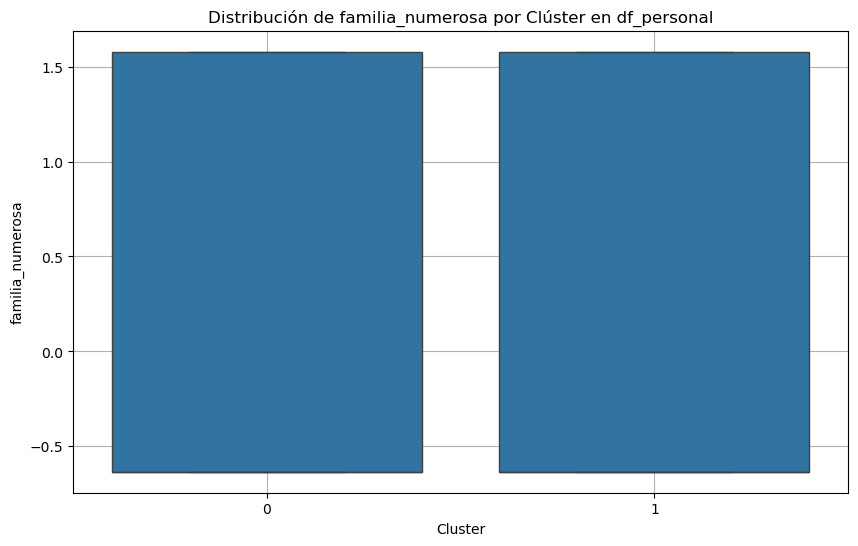

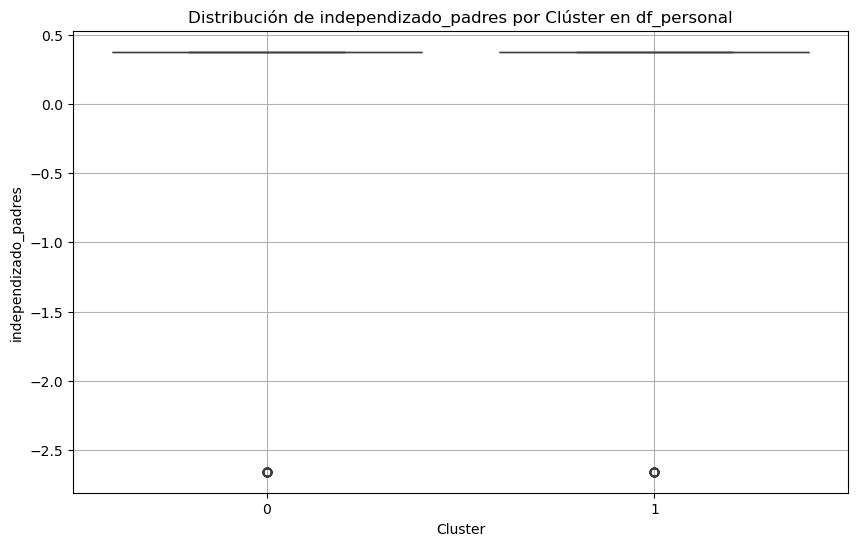

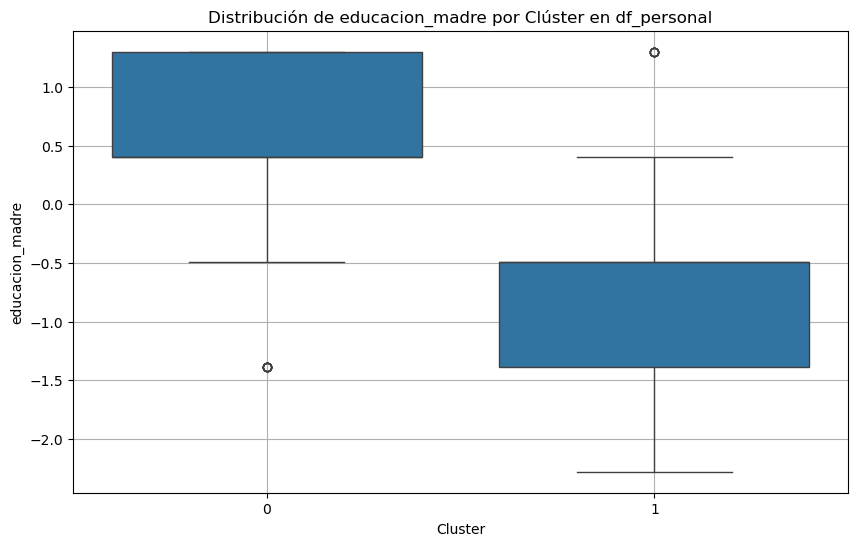

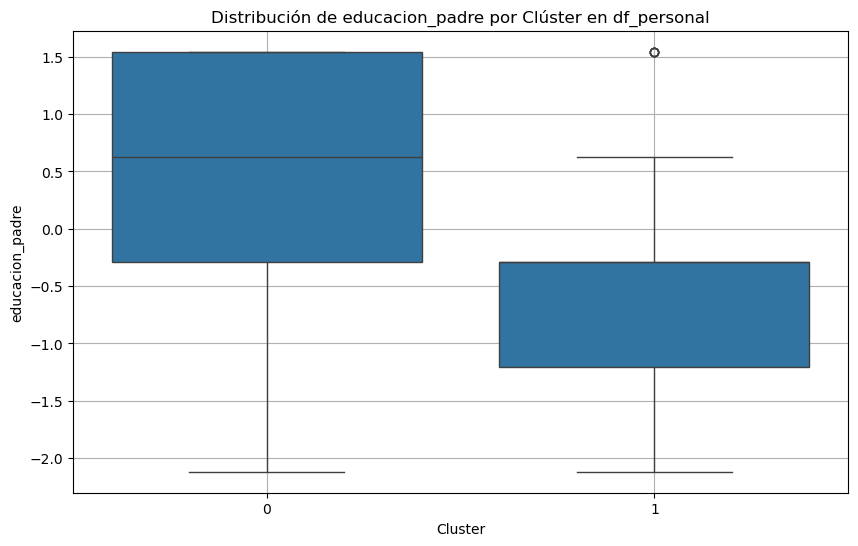

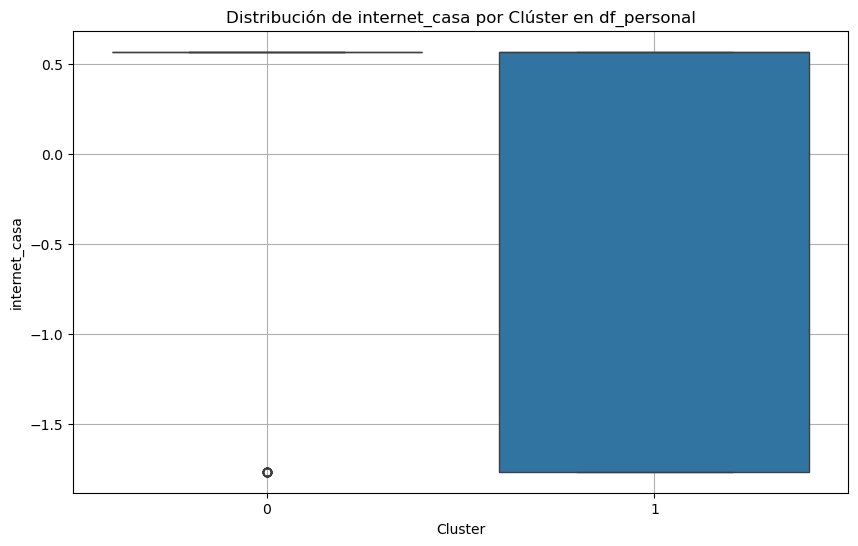

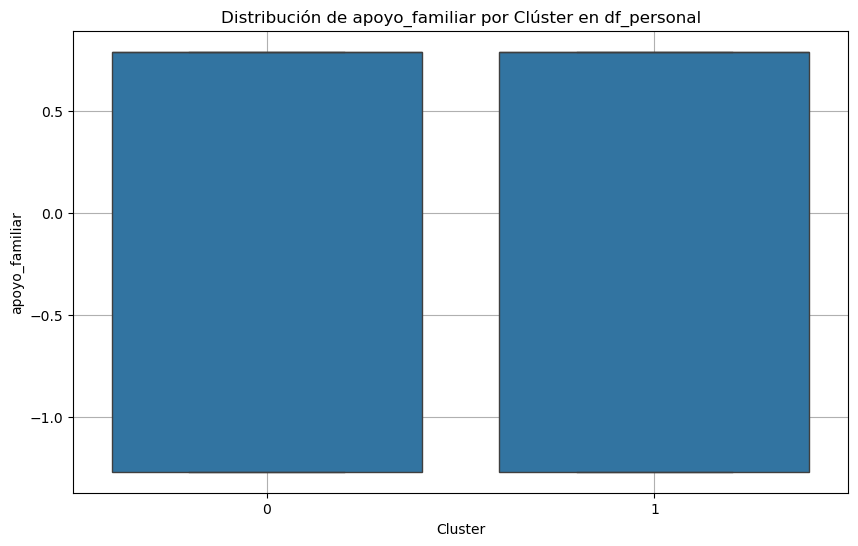

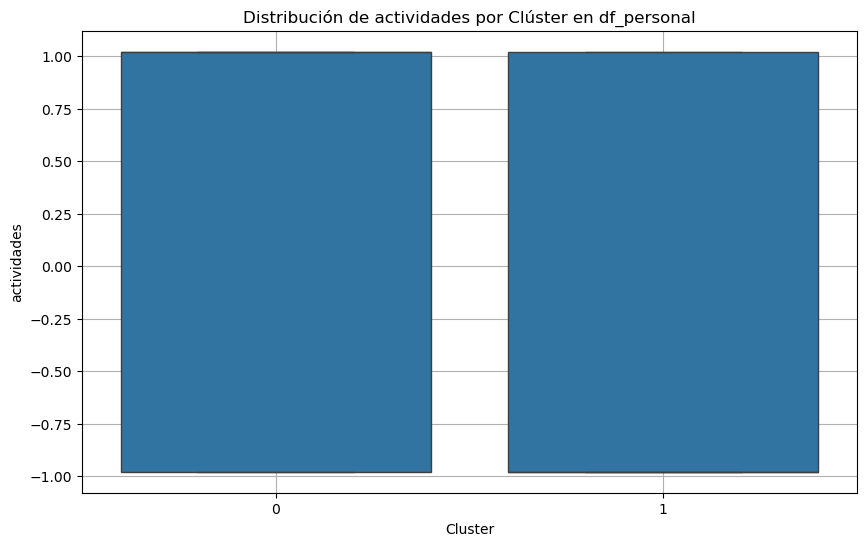

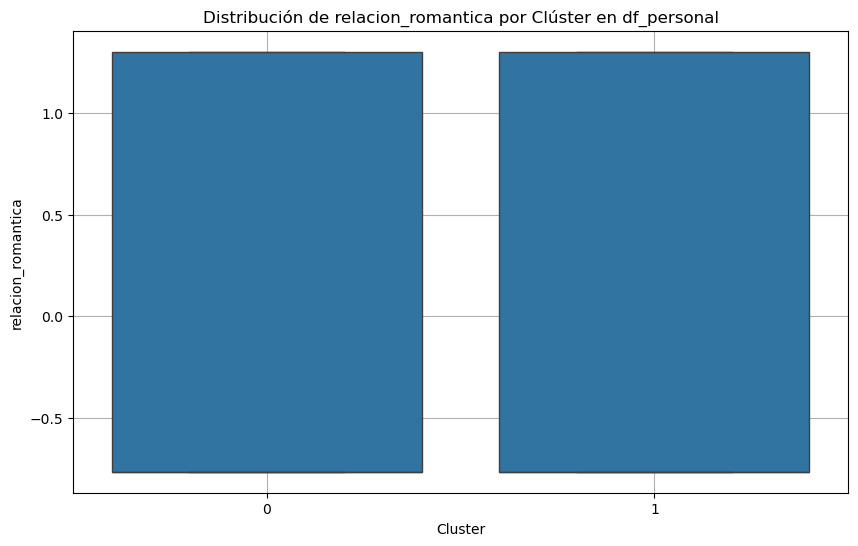

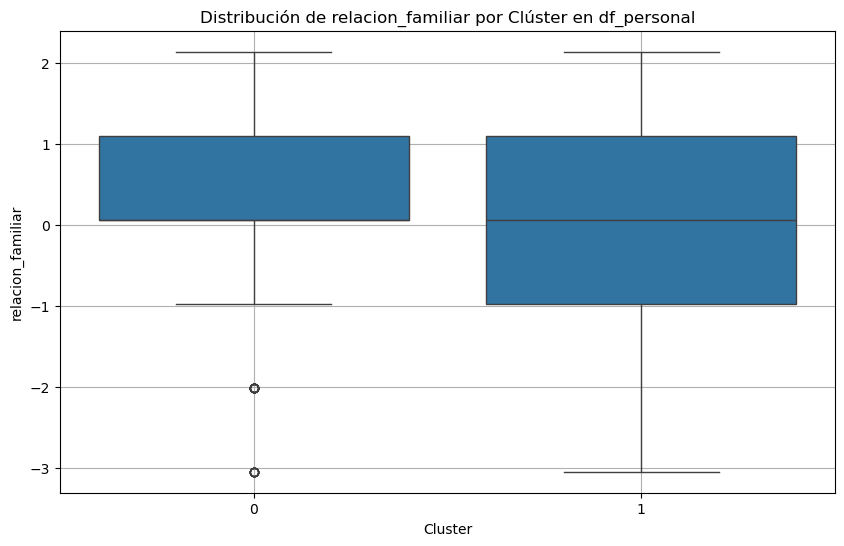

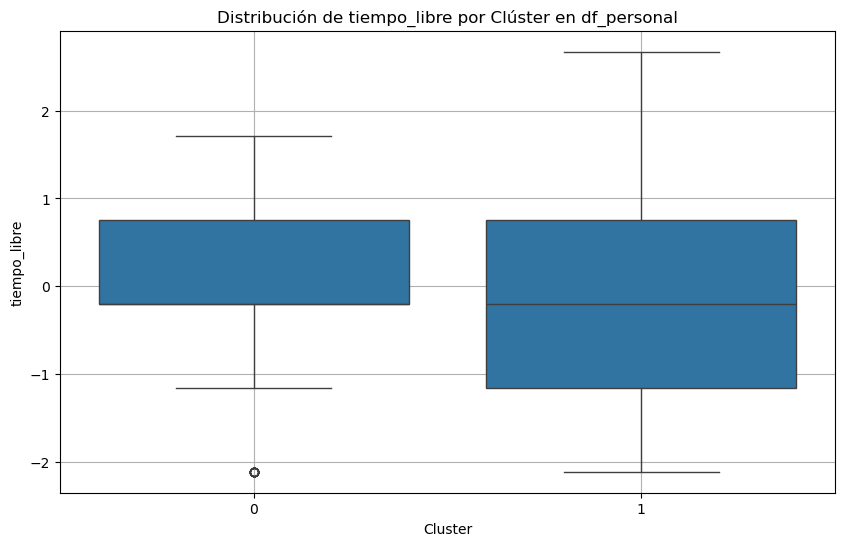

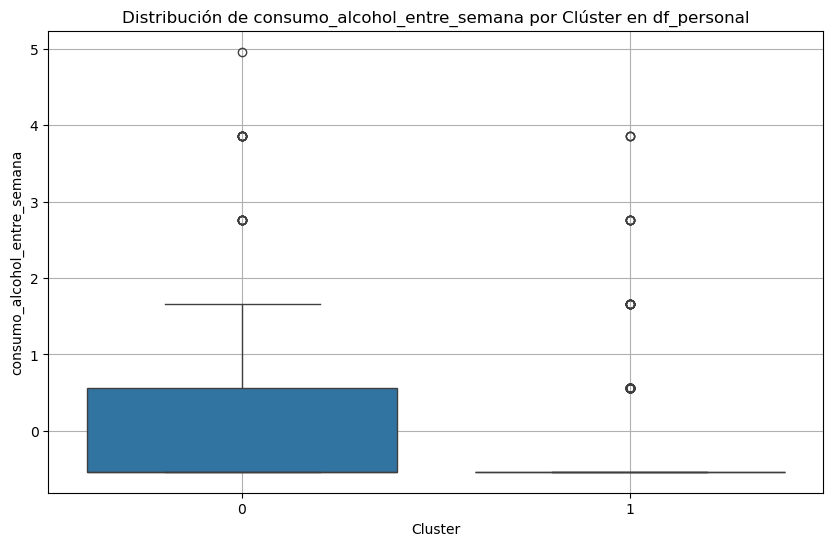

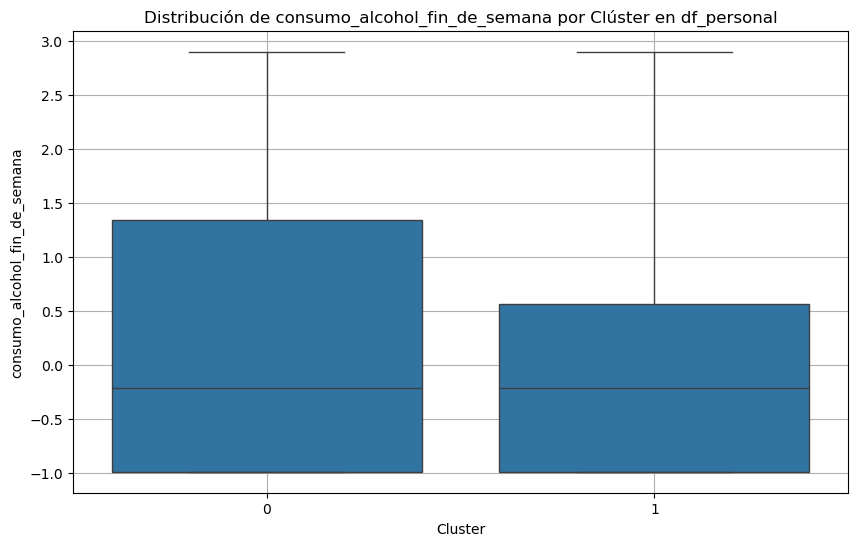

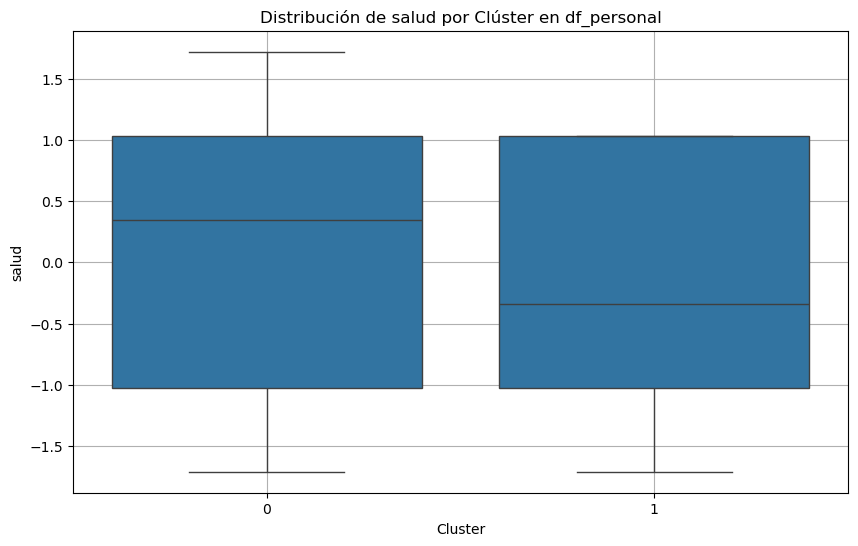

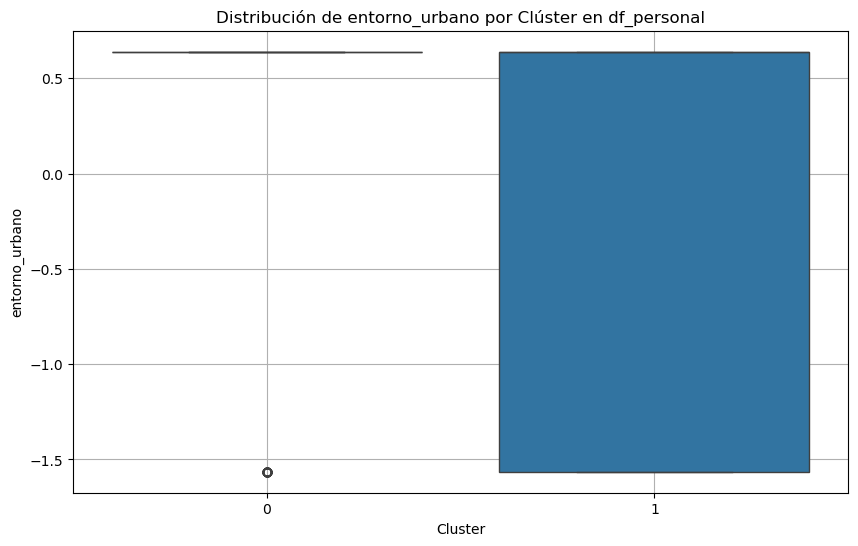

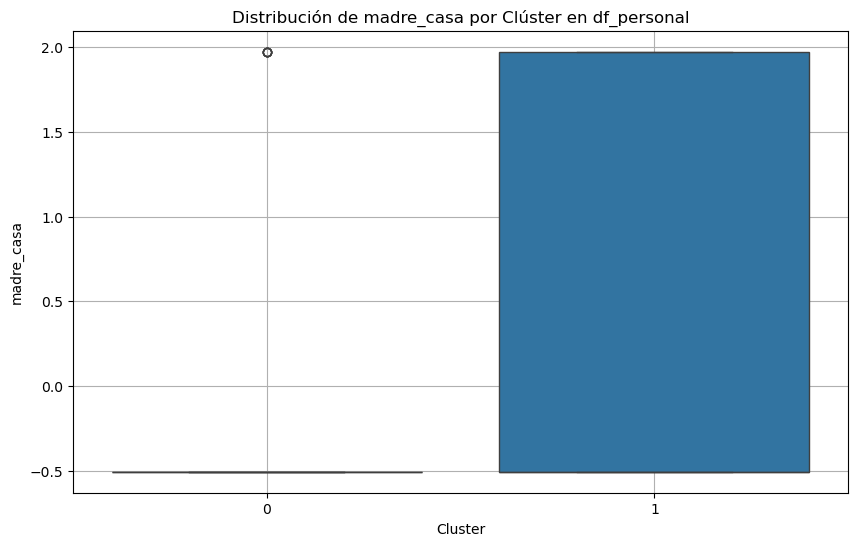

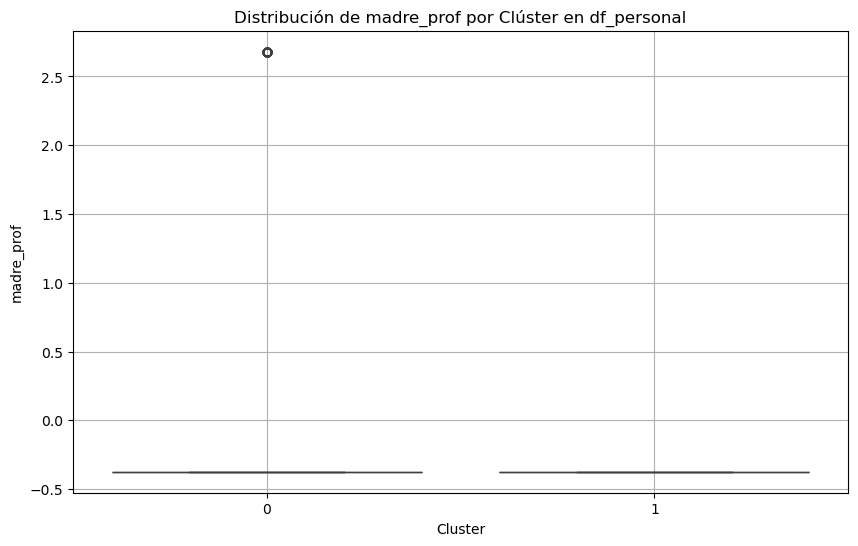

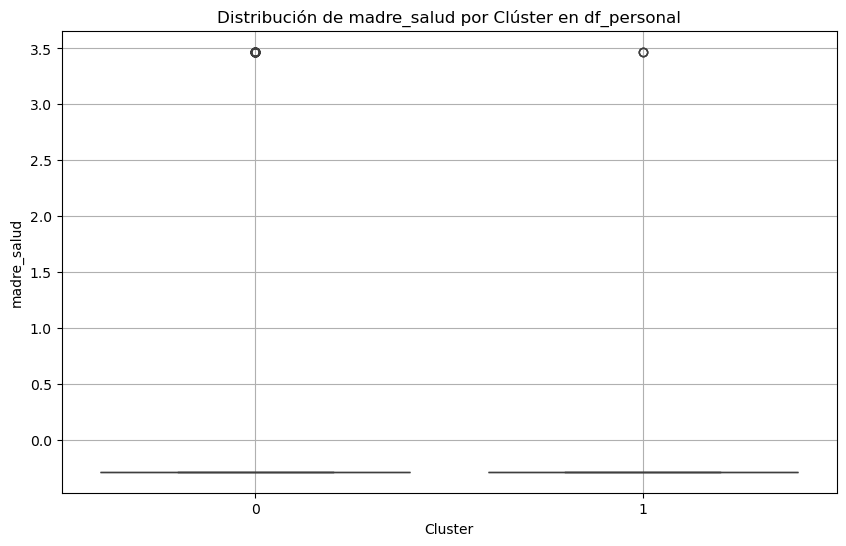

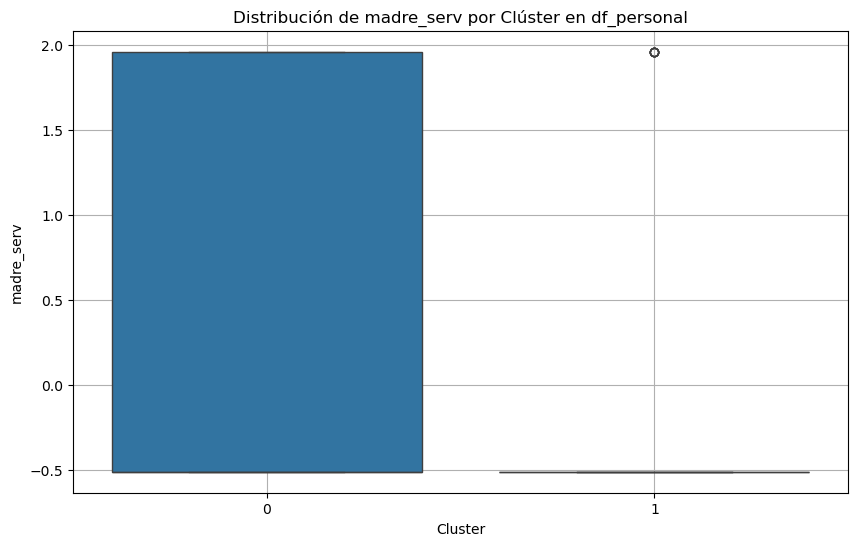

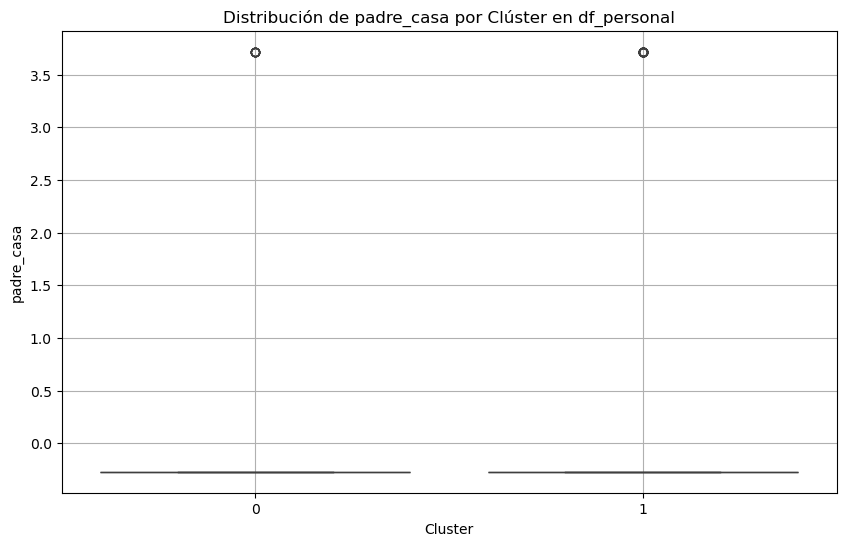

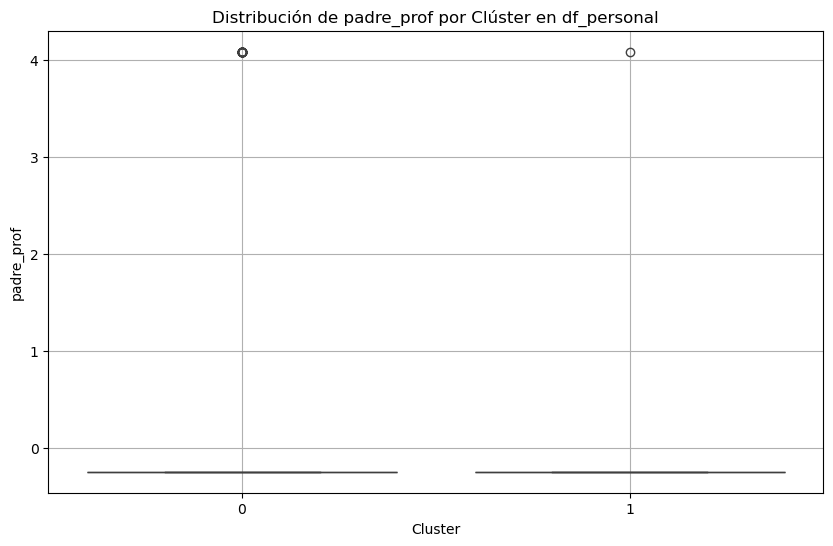

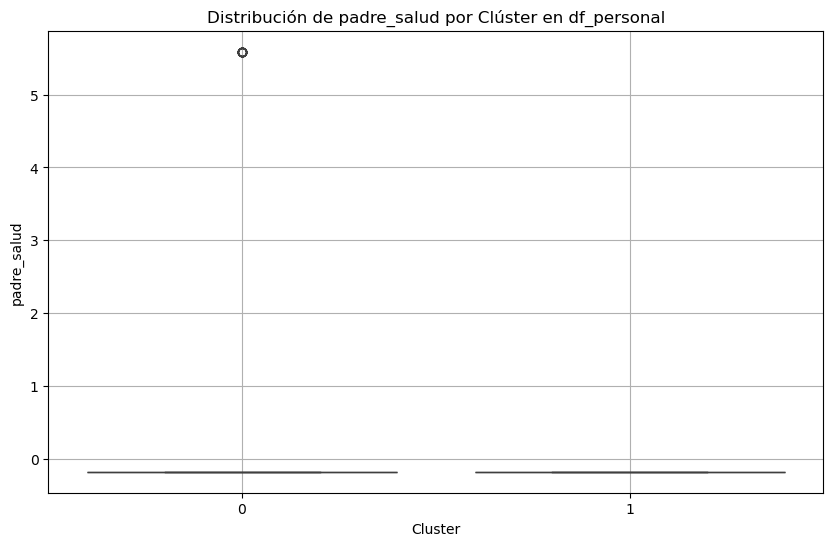

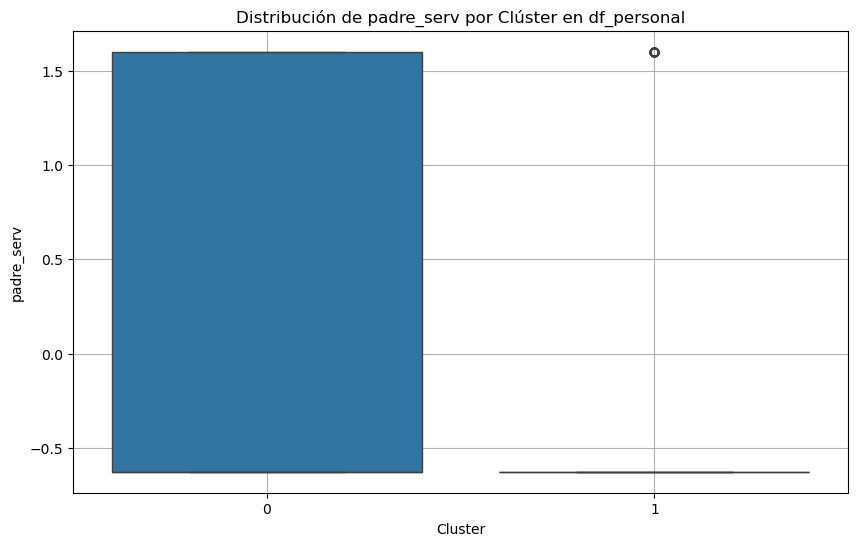

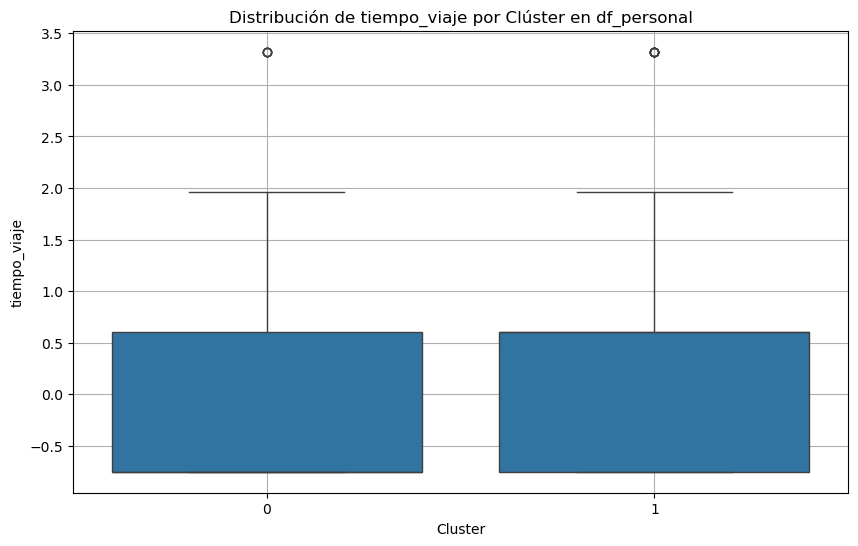

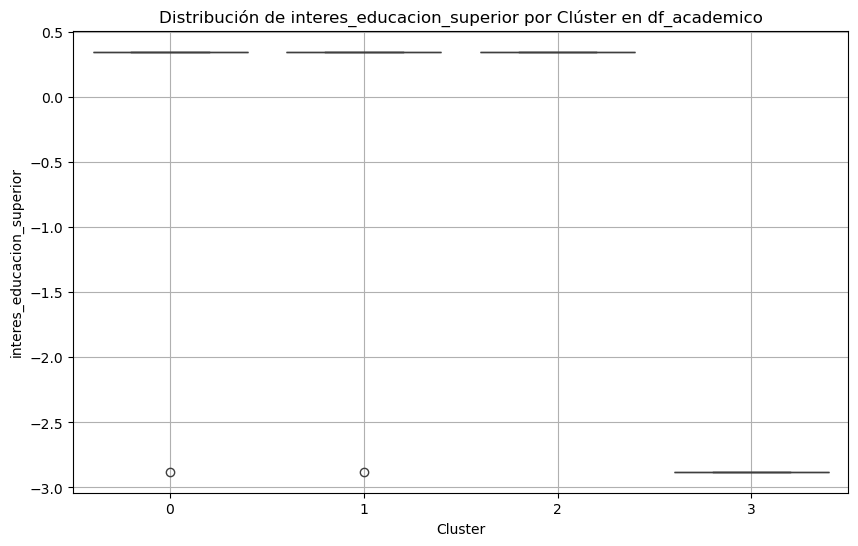

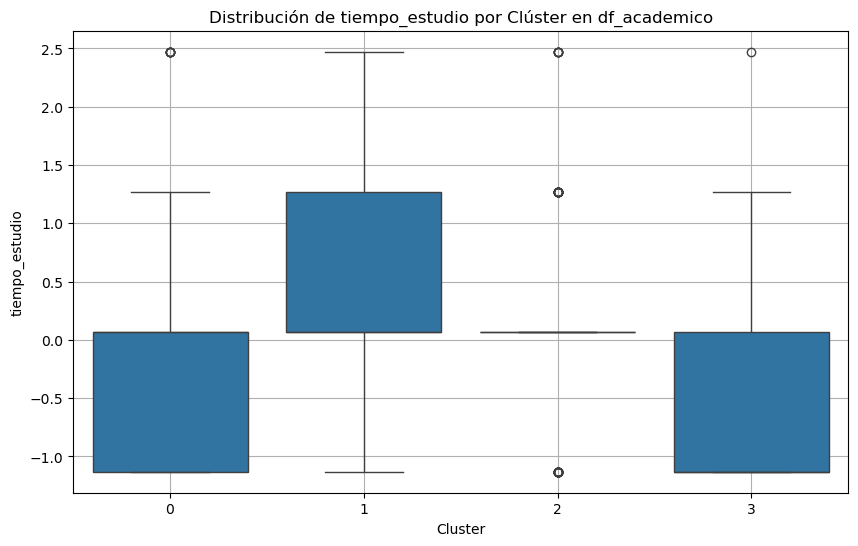

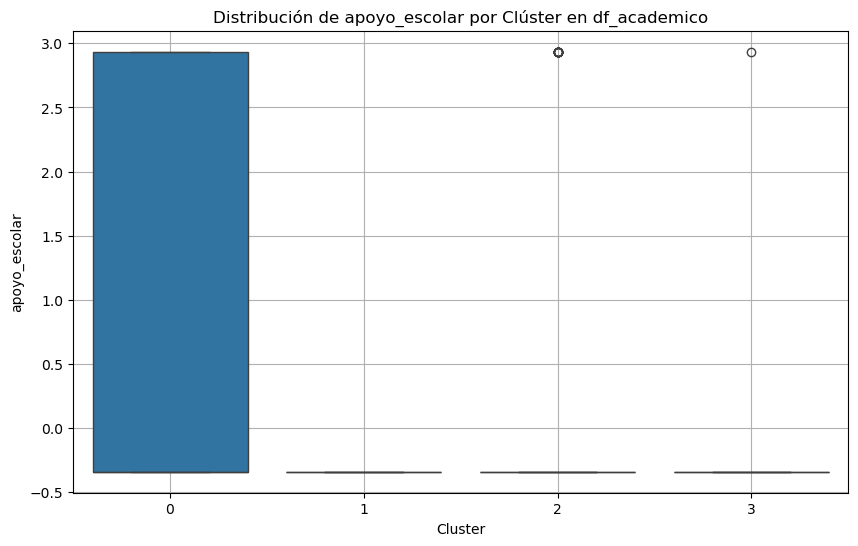

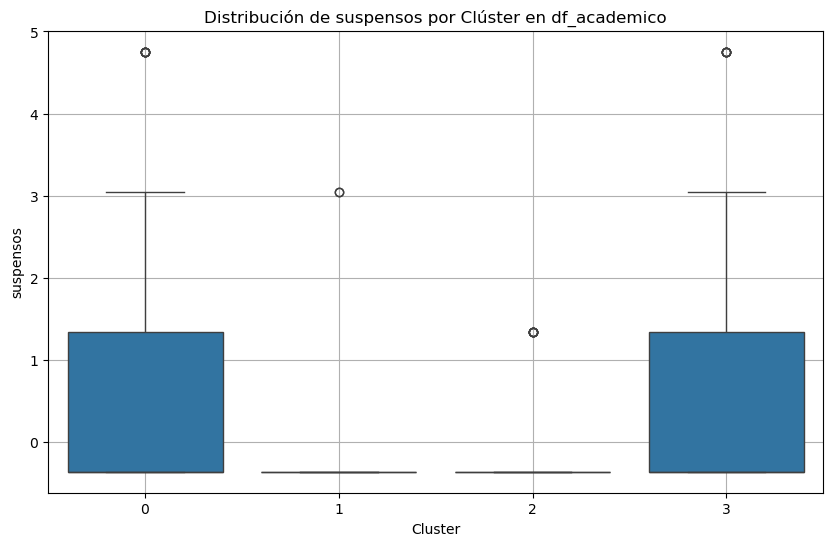

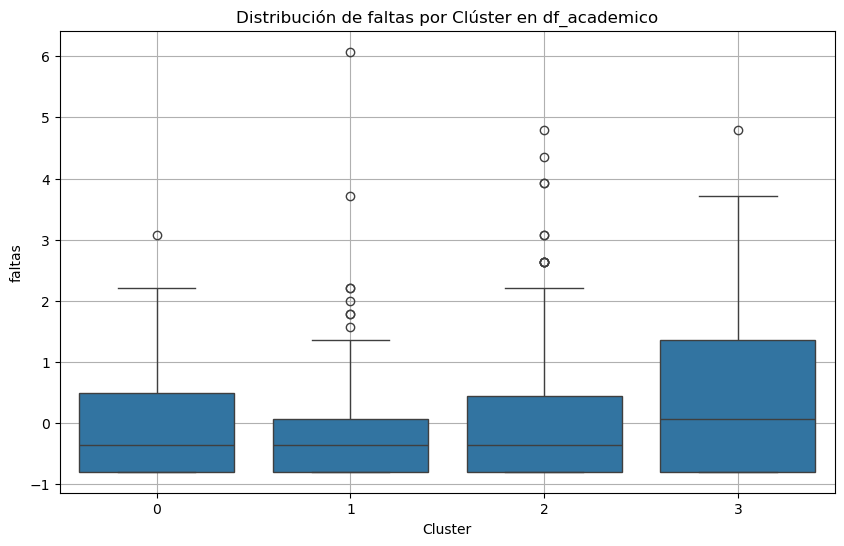

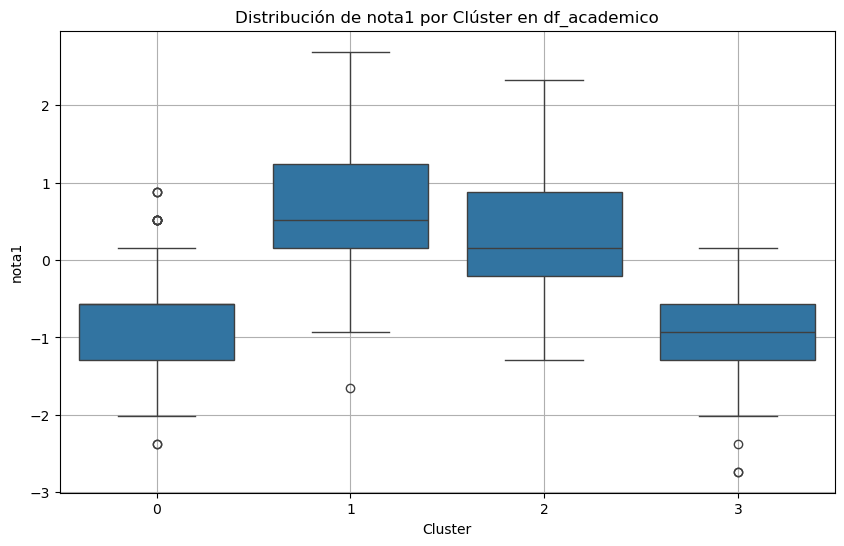

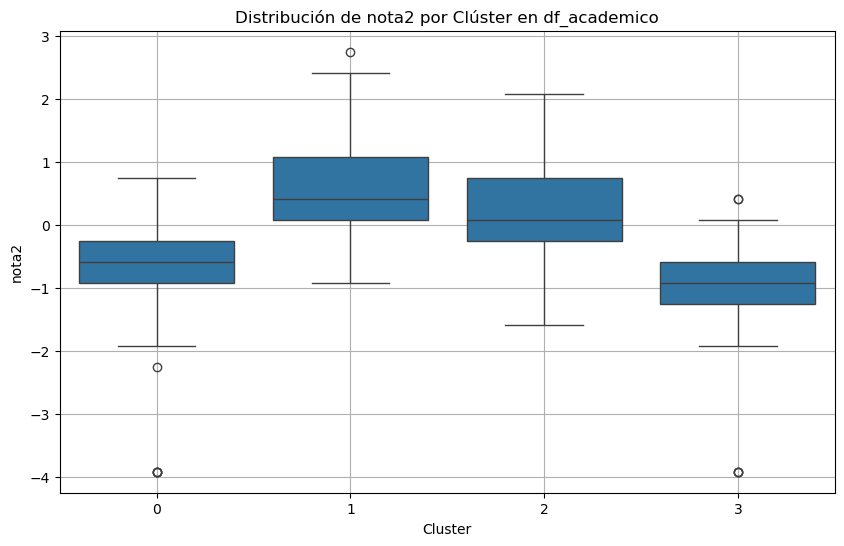

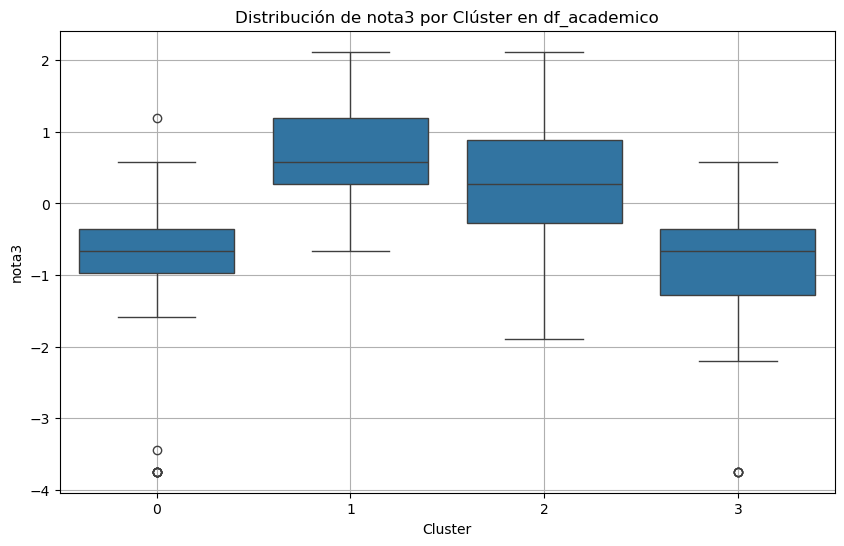

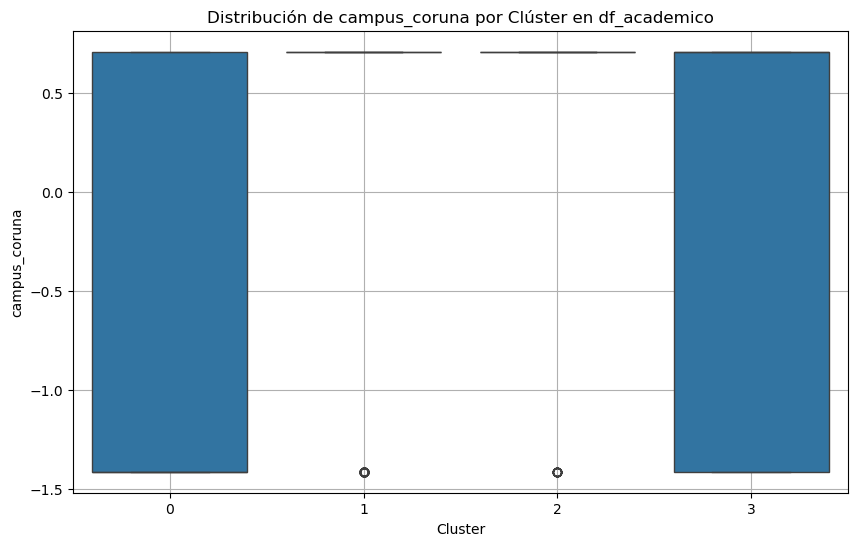

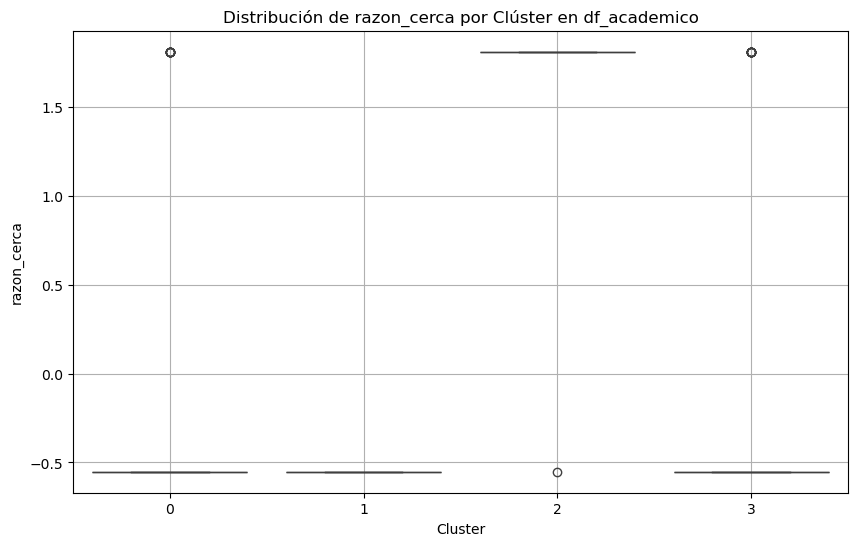

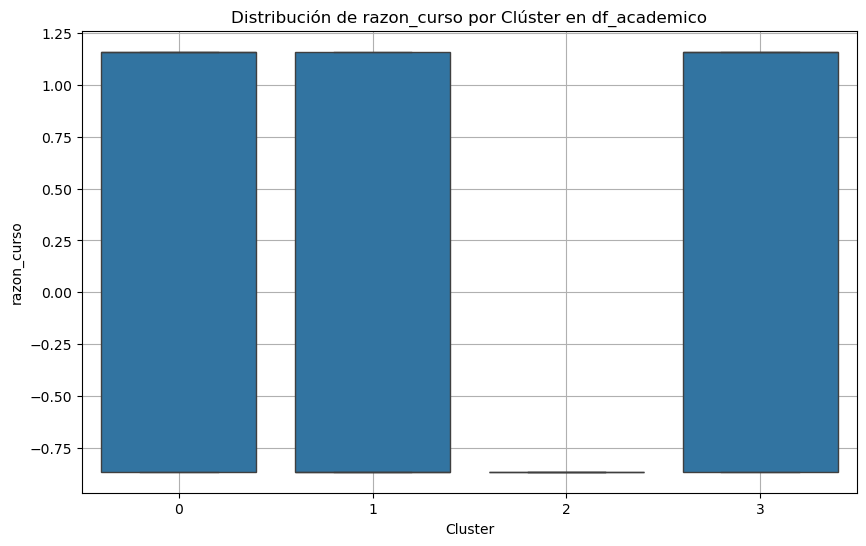

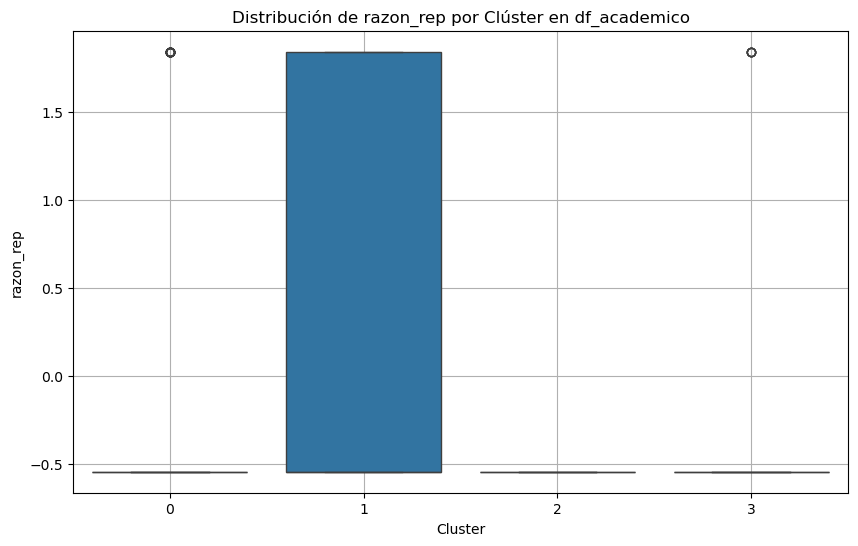

In [111]:
# Boxplots para df_personal
for column in df_personal.columns:
    if column != 'cluster_2pp':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='cluster_2pp', y=column, data=df_personal)
        plt.title(f'Distribución de {column} por Clúster en df_personal')
        plt.xlabel('Cluster')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()

# Boxplots para df_academico
for column in df_academico.columns:
    if column != 'cluster_4pp':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='cluster_4pp', y=column, data=df_academico)
        plt.title(f'Distribución de {column} por Clúster en df_academico')
        plt.xlabel('Cluster')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()

In [112]:
# Calcular la distancia intra-cluster para df_academico
inercia_academico = kmeanspp_academico_4.inertia_
print(f'Distancia intra-cluster para df_academico: {inercia_academico}')

# Calcular la distancia intra-cluster para df_personal
inercia_personal = kmeanspp_personal_2.inertia_
print(f'Distancia intra-cluster para df_personal: {inercia_personal}')

Distancia intra-cluster para df_academico: 4754.9641374672365
Distancia intra-cluster para df_personal: 13203.96360982546


#### Explicaciones:
- **Inercia:**

La inercia es una métrica utilizada en el algoritmo k-means para evaluar la calidad de los clusters formados. Representa la suma de las distancias cuadradas de cada punto de datos a su centroide más cercano.
Una menor inercia indica que los puntos están más cerca de sus centroides, lo que generalmente sugiere clusters más compactos y bien definidos.
Cálculo de la inercia:

kmeanspp_academico_4.inertia_: Calcula la inercia para el conjunto de datos df_academico utilizando el modelo kmeanspp_academico_4.
kmeanspp_personal_2.inertia_: Calcula la inercia para el conjunto de datos df_personal utilizando el modelo kmeanspp_personal_2.



#### Conclusiones sobre la Distancia Intra-Cluster para `df_academico`

- **Distancia intra-cluster para `df_academico`**: 4754.9641374672365

#### Interpretación de los Resultados

1. **Compacidad de los Clústeres**:
   - La inercia de 4754.9641374672365 sugiere que los clústeres formados en `df_academico` son relativamente compactos y bien definidos.
   - Los puntos dentro de cada clúster están más cerca de sus respectivos centroides, lo que indica una buena calidad de clustering.

2. **Número de Clústeres**:
   - En este caso, se han utilizado 4 clústeres para `df_academico`.
   - La inercia tiende a disminuir a medida que aumenta el número de clústeres, pero es importante encontrar un equilibrio para evitar el sobreajuste.



#### Conclusiones sobre la Distancia Intra-Cluster para `df_personal`

- **Distancia intra-cluster para `df_personal`**: 13203.96360982546

#### Interpretación de los Resultados

1. **Compacidad de los Clústeres**:
   - La inercia de 13203.96360982546 sugiere que los clústeres formados en `df_personal` son menos compactos y más dispersos en comparación con `df_academico`.
   - Los puntos dentro de cada clúster están más dispersos, lo que indica una menor calidad de clustering.

2. **Número de Clústeres**:
   - En este caso, se han utilizado 2 clústeres para `df_personal`.
   - La inercia tiende a disminuir a medida que aumenta el número de clústeres, pero es importante encontrar un equilibrio para evitar el sobreajuste.

---


### Análisis de centroides

Centroides de los clústeres para df_personal:



Centroides de los clústeres para df_academico:


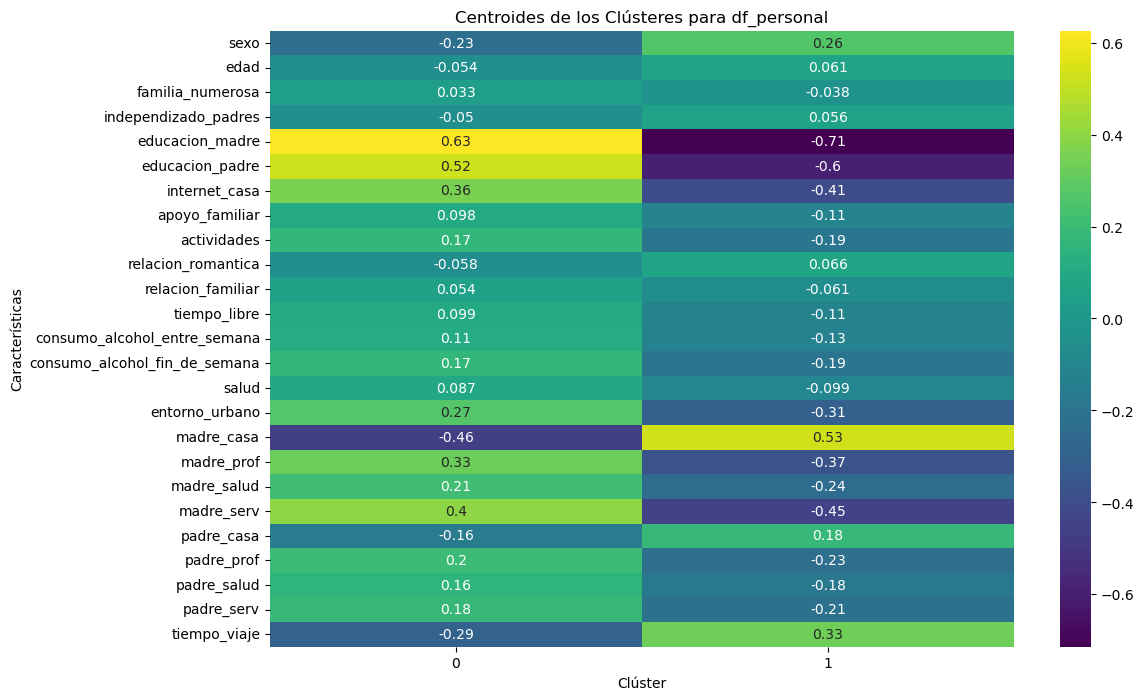

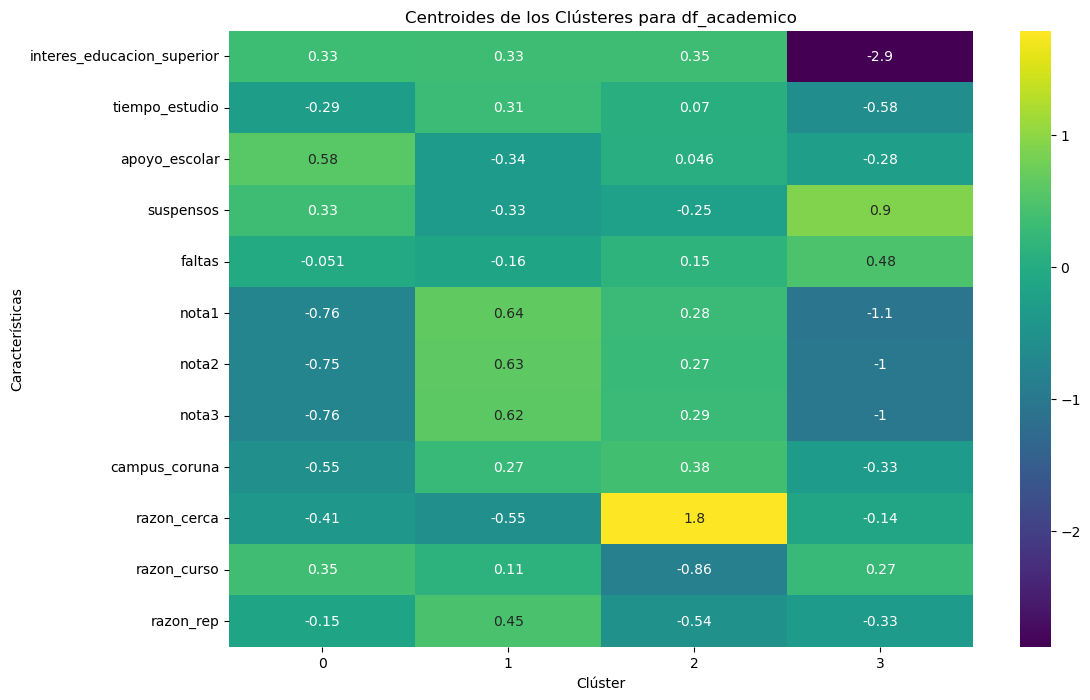

In [113]:
import seaborn as sns

# Calcular los centroides de los clústeres para df_personal y df_academico
centroides_personal = df_personal.groupby('cluster_2pp').mean()
centroides_academico = df_academico.groupby('cluster_4pp').mean()

# Mostrar los centroides en formato tabla
print("Centroides de los clústeres para df_personal:")
display(centroides_personal.style.set_caption("Centroides de los Clústeres para df_personal").set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16px'), ('font-weight', 'bold')]
}]))

print("\nCentroides de los clústeres para df_academico:")
display(centroides_academico.style.set_caption("Centroides de los Clústeres para df_academico").set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16px'), ('font-weight', 'bold')]
}]))

# Visualizar los centroides
import matplotlib.pyplot as plt

# Centroides para df_personal
plt.figure(figsize=(12, 8))
sns.heatmap(centroides_personal.T, annot=True, cmap='viridis')
plt.title('Centroides de los Clústeres para df_personal')
plt.xlabel('Clúster')
plt.ylabel('Características')
plt.show()

# Centroides para df_academico
plt.figure(figsize=(12, 8))
sns.heatmap(centroides_academico.T, annot=True, cmap='viridis')
plt.title('Centroides de los Clústeres para df_academico')
plt.xlabel('Clúster')
plt.ylabel('Características')
plt.show()


#### Tablas de Centroides

1. **Centroides de los Clústeres para `df_personal`**:
   - La tabla muestra los valores medios de cada característica para cada clúster en `df_personal`.
   - Cada fila representa una característica y cada columna representa un clúster.
   - Los valores en la tabla indican el valor promedio de la característica correspondiente para los estudiantes en ese clúster.

2. **Centroides de los Clústeres para `df_academico`**:
   - Similar a la tabla anterior, pero para los datos académicos.
   - Muestra los valores medios de cada característica para cada clúster en `df_academico`.

#### Mapas de Calor (Heatmaps)

1. **Mapa de Calor para `df_personal`**:
   - El mapa de calor visualiza los centroides de los clústeres para `df_personal`.
   - El eje X representa los clústeres y el eje Y representa las características.
   - Los colores indican los valores medios de las características, con una escala de colores que va de más bajo (colores más oscuros) a más alto (colores más claros).
   - Las anotaciones (`annot=True`) muestran los valores numéricos en cada celda del mapa de calor.

2. **Mapa de Calor para `df_academico`**:
   - Similar al mapa de calor anterior, pero para los datos académicos.
   - Visualiza los centroides de los clústeres para `df_academico`.




### Análisis de los clúster de características personales

#### **Clúster 0**:
1. **Características destacadas (valores positivos)**:
   - **Educación de la madre y padre**: La educación materna y paterna tiene una contribución significativa en este grupo (valores altos positivos), lo que podría indicar un nivel educativo elevado de los padres.
   - **Acceso a internet en casa**: También tiene un peso relevante, sugiriendo un entorno con acceso adecuado a recursos tecnológicos.
   - **Entorno urbano**: Contribuye de forma positiva, indicando que este clúster se asocia con personas que viven en áreas urbanas.
   - **Madre en roles profesionales**: Se observa un peso positivo moderado para "madre_prof" y "madre_serv", lo que podría señalar que las madres tienen ocupaciones laborales destacadas fuera del hogar.

2. **Características negativas**:
   - **Madre en el hogar ("madre_casa")**: Valor negativo fuerte, lo que podría implicar que en este grupo es menos común que las madres se dediquen exclusivamente al hogar.
   - **Viaje**: El tiempo de viaje tiene un impacto negativo, indicando que este grupo podría tender a estar más cerca de sus actividades habituales.

**Resumen**: Este clúster representa probablemente a individuos provenientes de un entorno urbano con buen acceso a recursos tecnológicos, familias con padres bien educados y madres laboralmente activas.


#### **Clúster 1**:
1. **Características destacadas (valores positivos)**:
   - **Madre en casa ("madre_casa")**: Tiene un valor significativamente alto, lo que indica que en este grupo es común que las madres se dediquen exclusivamente al cuidado del hogar.
   - **Tiempo de viaje**: Este valor es positivo, sugiriendo que las personas de este grupo podrían estar más acostumbradas a viajar distancias mayores.

2. **Características negativas**:
   - **Educación de la madre y padre**: Ambos valores son negativos, lo que podría indicar un menor nivel educativo entre los padres.
   - **Internet en casa**: Este valor también es bajo, sugiriendo una posible menor disponibilidad de recursos tecnológicos.
   - **Entorno urbano**: Contribución negativa, lo que podría implicar que este grupo está asociado con áreas rurales o menos urbanizadas.

**Resumen**: Este clúster representa probablemente a individuos de áreas rurales, con un entorno familiar más tradicional, donde las madres suelen dedicarse al hogar, y menor acceso a tecnología y recursos educativos.


#### Comparación general:
- **Clúster 0**: Más urbano, acceso a recursos tecnológicos, mayor nivel educativo en los padres.
- **Clúster 1**: Más rural, menor acceso a tecnología, roles familiares tradicionales.


### Análisis de los clúster de características académicas

#### **Clúster 0**: *Estudiantes con apoyo escolar pero con desafíos académicos significativos*
1. **Características destacadas (valores positivos)**:
   - **Apoyo escolar**: Los estudiantes de este grupo reciben un apoyo moderado en su aprendizaje, lo que indica un esfuerzo por parte de su entorno para mejorar su desempeño.
   - **Interés en la educación superior**: Este grupo muestra cierto interés en continuar estudiando, aunque no es su principal fortaleza.

2. **Características negativas**:
   - **Notas académicas (nota1, nota2, nota3)**: Este grupo tiene un rendimiento académico bajo de manera consistente en las asignaturas principales.
   - **Suspensos y faltas**: Se presentan niveles moderados de reprobaciones y ausencias, lo que podría explicar las bajas calificaciones.

**Resumen**: Este clúster representa a estudiantes que, aunque reciben algo de apoyo y tienen cierto interés por la educación superior, enfrentan grandes retos académicos, con bajas calificaciones y una participación escolar irregular.


#### **Clúster 1**: *Estudiantes de alto desempeño académico y motivados*
1. **Características destacadas (valores positivos)**:
   - **Notas académicas (nota1, nota2, nota3)**: Los estudiantes de este grupo se caracterizan por obtener calificaciones altas en sus materias.
   - **Interés en la educación superior**: Existe una motivación clara hacia continuar con sus estudios, reflejando aspiraciones académicas importantes.
   - **Apoyo escolar**: Cuentan con un entorno favorable que apoya su desempeño y motivación académica.

2. **Características negativas**:
   - **Suspensos y faltas**: Valores negativos indican que este grupo no enfrenta grandes problemas relacionados con reprobaciones o ausencias.

**Resumen**: Este clúster representa a estudiantes que tienen un desempeño académico sobresaliente, un entorno de apoyo sólido y una motivación clara para continuar con su educación, lo que los posiciona como alumnos ejemplares.


#### **Clúster 2**: *Estudiantes con desempeño moderado y decisiones académicas pragmáticas*
1. **Características destacadas (valores positivos)**:
   - **Apoyo escolar**: Los estudiantes en este grupo cuentan con algún nivel de soporte académico, aunque no es tan alto como en otros clústeres.
   - **Interés en la educación superior**: Aunque existe interés por continuar estudiando, es más moderado en comparación con otros grupos.

2. **Características negativas**:
   - **Notas académicas (nota1, nota2, nota3)**: Los valores son intermedios, indicando un rendimiento que no es ni excepcional ni particularmente bajo.
   - **Suspensos y faltas**: Presentan un desempeño algo irregular, con niveles moderados de reprobaciones y ausencias.

**Resumen**: Este clúster se asocia con estudiantes que presentan un rendimiento académico moderado, mantienen cierto interés por avanzar en su educación y toman decisiones prácticas basadas en las oportunidades que tienen disponibles.


#### **Clúster 3**: *Estudiantes con bajos resultados y desmotivación académica*
1. **Características destacadas (valores positivos)**:
   - **Suspensos**: Los estudiantes de este grupo tienen un nivel alto de reprobaciones, lo que indica dificultades significativas para cumplir con los requisitos académicos.
   - **Faltas**: Presentan muchas ausencias, lo que impacta negativamente su progreso educativo.

2. **Características negativas**:
   - **Interés en la educación superior**: Este grupo está desmotivado para continuar con sus estudios, reflejando poca proyección hacia niveles educativos superiores.
   - **Notas académicas (nota1, nota2, nota3)**: Las calificaciones son consistentemente bajas en todas las materias, evidenciando un bajo rendimiento general.

**Resumen**: Este clúster agrupa a estudiantes con un desempeño académico deficiente, problemas de asistencia y una falta de motivación para continuar su formación académica.


---

### Comparación General:
1. **Clúster 0**: Estudiantes con apoyo y algo de interés académico, pero que enfrentan desafíos importantes, especialmente en su rendimiento.
2. **Clúster 1**: Estudiantes destacados, con un alto rendimiento académico y una fuerte motivación para continuar estudiando.
3. **Clúster 2**: Estudiantes con desempeño académico promedio y decisiones más pragmáticas respecto a su educación.
4. **Clúster 3**: Estudiantes con dificultades importantes en rendimiento, asistencia y motivación, lo que los coloca en una posición de alto riesgo académico.
---

### T-Test de Student

El test t de Student es una técnica estadística utilizada para comparar las medias de dos grupos (o dos clústers en este caso) para determinar si hay una diferencia significativa entre ellas. A continuación, se explica cómo funciona el test t de Student y cómo se puede interpretar.

### Cómo Funciona el Test t de Student

1. **Hipótesis Nula (H0)**: Las medias de los dos grupos son iguales.
2. **Hipótesis Alternativa (H1)**: Las medias de los dos grupos son diferentes.

### Pasos del Test t de Student

1. **Calcular la Media y la Varianza de Cada Grupo**: Se calculan las medias y las varianzas de los dos grupos.
2. **Calcular el Estadístico t**: El estadístico t se calcula utilizando las medias, las varianzas y el tamaño de las muestras de los dos grupos.
3. **Calcular los Grados de Libertad**: Los grados de libertad se calculan en función del tamaño de las muestras de los dos grupos.
4. **Comparar el Estadístico t con el Valor Crítico**: Se compara el estadístico t con el valor crítico de la distribución t para determinar si se rechaza la hipótesis nula.

In [114]:
# Realizar el test t para cada columna en df_personal excepto 'cluster_2pp'
import numpy as np
from scipy.stats import ttest_ind

resultados_ttest = []

for column in df_personal.columns:
    if column != 'cluster_2pp':
        cluster_0 = df_personal[df_personal['cluster_2pp'] == 0][column]
        cluster_1 = df_personal[df_personal['cluster_2pp'] == 1][column]

        # Realizar el test t
        ttest_result = ttest_ind(cluster_0, cluster_1)

        # Guardar los resultados en una lista
        resultados_ttest.append({
            'Variable': column,
            'Estadístico t': ttest_result.statistic,
            'Valor p': ttest_result.pvalue,
            'Significativo': 'Sí' if ttest_result.pvalue < 0.05 else 'No'
        })

# Convertir los resultados a un DataFrame
df_resultados_ttest = pd.DataFrame(resultados_ttest)

# Mostrar los resultados en formato tabla
print("Resultados del test t para cada variable en df_personal:")
print("Una variable es significativa si el valor p es menor a 0.05.")
display(df_resultados_ttest)

Resultados del test t para cada variable en df_personal:
Una variable es significativa si el valor p es menor a 0.05.


c:\Users\Hugo\miniconda3\envs\aa\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Variable  Estadístico t       Valor p Significativo
0                            sexo      -5.913872  5.896445e-09            Sí
1                            edad      -1.343948  1.795233e-01            No
2                familia_numerosa       0.821470  4.117370e-01            No
3            independizado_padres      -1.237346  2.164906e-01            No
4                 educacion_madre      21.000447  3.234880e-72            Sí
5                 educacion_padre      15.805994  1.296425e-46            Sí
6                   internet_casa       9.681973  1.446120e-20            Sí
7                  apoyo_familiar       2.456579  1.433684e-02            Sí
8                     actividades       4.203369  3.072250e-05            Sí
9              relacion_romantica      -1.448272  1.481151e-01            No
10              relacion_familiar       1.341562  1.802956e-01            No
11                   tiempo_libre       2.488712  1.311754e-02            Sí
12   consumo_alcohol_entre_semana       2.815087  5.052465e-03            Sí
13  consumo_alcohol_fin_de_semana       4.302399  2.002239e-05            Sí
14                          salud       2.186005  2.923921e-02            Sí
15                 entorno_urbano       7.024634  6.414691e-12            Sí
16                     madre_casa     -13.345551  2.308277e-35            Sí
17                     madre_prof       8.715096  3.483574e-17            Sí
18                    madre_salud       5.484713  6.342174e-08            Sí
19                     madre_serv      10.907492  3.398500e-25            Sí
20                     padre_casa      -4.049817  5.868090e-05            Sí
21                     padre_prof       5.105182  4.571292e-07            Sí
22                    padre_salud       3.970856  8.120110e-05            Sí
23                     padre_serv       4.641002  4.346468e-06            Sí
24                   tiempo_viaje      -7.619952  1.128716e-13            Sí

#### Conclusiones del Test t para `df_personal`

El test t de Student se ha realizado para comparar las medias de las características entre dos clústeres en el DataFrame `df_personal`. Los resultados indican que la mayoría de las variables tienen diferencias significativas entre los clústeres, excepto las siguientes variables: `edad`, `familia_numerosa`, `independizado_padres`, `relacion_romantica` y `relacion_familiar`.

#### Variables con Diferencias Significativas

Para las variables que resultaron significativas (valor p < 0.05), podemos concluir que hay diferencias estadísticamente significativas en las medias de estas características entre los dos clústeres. Esto sugiere que estas características son importantes para distinguir entre los clústeres. Las variables significativas pueden incluir, por ejemplo:

- `sexo`
- `educacion_madre`
- `educacion_padre`
- `internet_casa`
- `apoyo_familiar`
- `actividades`
- `tiempo_libre`
- `consumo_alcohol_entre_semana`
- `consumo_alcohol_fin_de_semana`
- `salud`
- `entorno_urbano`
- `madre_casa`
- `madre_prof`
- `madre_salud`
- `madre_serv`
- `padre_casa`
- `padre_prof`
- `padre_salud`
- `padre_serv`
- `tiempo_viaje`

Estas variables pueden ser utilizadas para caracterizar y diferenciar los clústeres, proporcionando una visión más profunda de las diferencias entre los grupos.

#### Variables sin Diferencias Significativas

Para las variables que no resultaron significativas (valor p >= 0.05), podemos concluir que no hay diferencias estadísticamente significativas en las medias de estas características entre los dos clústeres. Esto sugiere que estas características no son importantes para distinguir entre los clústeres. Las variables no significativas son:

- `edad`
- `familia_numerosa`
- `independizado_padres`
- `relacion_romantica`
- `relacion_familiar`

Estas variables no contribuyen significativamente a la diferenciación de los clústeres y pueden ser menos relevantes para el análisis de los clústeres.

### Interpretación de los Resultados

1. **Variables Significativas**:
   - Las variables significativas indican que hay diferencias importantes en estas características entre los clústeres.
   - Estas diferencias pueden ser utilizadas para entender mejor las características distintivas de cada clúster y para desarrollar estrategias específicas para cada grupo.

2. **Variables No Significativas**:
   - Las variables no significativas indican que no hay diferencias importantes en estas características entre los clústeres.
   - Estas variables pueden ser menos relevantes para el análisis de los clústeres y pueden no ser útiles para diferenciar entre los grupos.

### Conclusión

El test t de Student ha revelado que la mayoría de las variables en `df_personal` tienen diferencias significativas entre los dos clústeres, excepto `edad`, `familia_numerosa`, `independizado_padres`, `relacion_romantica` y `relacion_familiar`. Estas conclusiones proporcionan una visión clara de las características que son importantes para distinguir entre los clústeres y pueden ser utilizadas para desarrollar estrategias específicas para cada grupo.

---

#### Test ANOVA

El test ANOVA (Análisis de Varianza) es una técnica estadística utilizada para comparar las medias de tres o más grupos para determinar si al menos una de las medias es significativamente diferente de las demás. ANOVA evalúa la variabilidad dentro de los grupos y entre los grupos para determinar si las diferencias observadas son estadísticamente significativas. Se utiliza con 3 o más clústers.

### Cómo Funciona el Test ANOVA

1. **Hipótesis Nula (H0)**: Todas las medias de los grupos son iguales.
2. **Hipótesis Alternativa (H1)**: Al menos una de las medias de los grupos es diferente.

### Pasos del Test ANOVA

1. **Calcular la Variabilidad Total**: La variabilidad total en los datos se descompone en dos componentes: variabilidad entre los grupos y variabilidad dentro de los grupos.
2. **Calcular la Variabilidad Entre los Grupos (SSB)**: Mide la variabilidad de las medias de los grupos con respecto a la media global.
3. **Calcular la Variabilidad Dentro de los Grupos (SSW)**: Mide la variabilidad de los datos dentro de cada grupo.
4. **Calcular el Estadístico F**: El estadístico F se calcula como la razón entre la variabilidad entre los grupos y la variabilidad dentro de los grupos.
5. **Comparar el Estadístico F con el Valor Crítico**: Se compara el estadístico F con el valor crítico de la distribución F para determinar si se rechaza la hipótesis nula.

### Interpretación de los Resultados

- **F-Value**: Un valor alto del estadístico F indica que hay una mayor variabilidad entre los grupos en comparación con la variabilidad dentro de los grupos, lo que sugiere que al menos una de las medias de los grupos es significativamente diferente.
- **p-Value**: El p-Value indica la probabilidad de obtener un valor F al menos tan extremo como el observado, bajo la hipótesis nula. Un p-Value bajo (típicamente < 0.05) sugiere que se rechaza la hipótesis nula, indicando que hay diferencias significativas entre las medias de los grupos.


In [115]:
# Realizar el test ANOVA para cada columna en df_academico excepto 'cluster_4pp'
import numpy as np
from scipy.stats import f_oneway


resultados_anova = []

for column in df_academico.columns:
    if column != 'cluster_4pp':
        clusters = df_academico['cluster_4pp'].unique()
        data_by_cluster = [df_academico[df_academico['cluster_4pp'] == cluster][column] for cluster in clusters]

        # Realizar el test ANOVA
        anova_result = f_oneway(*data_by_cluster)

        # Guardar los resultados en una lista
        resultados_anova.append({
            'Variable': column,
            'Estadístico F': anova_result.statistic,
            'Valor p': anova_result.pvalue,
            'Significativo': 'Sí' if anova_result.pvalue < 0.05 else 'No'
        })

# Convertir los resultados a un DataFrame
df_resultados_anova = pd.DataFrame(resultados_anova)

# Mostrar los resultados en formato tabla
print("Resultados del test ANOVA para cada variable en df_academico:")
print("Una variable es significativa si el valor p es menor a 0.05.")
display(df_resultados_anova)

Resultados del test ANOVA para cada variable en df_academico:
Una variable es significativa si el valor p es menor a 0.05.


Variable  Estadístico F        Valor p Significativo
0   interes_educacion_superior    4618.278598   0.000000e+00            Sí
1               tiempo_estudio      19.965478   2.733503e-12            Sí
2                apoyo_escolar      32.242884   3.401868e-19            Sí
3                    suspensos      37.624707   4.163254e-22            Sí
4                       faltas       7.278696   8.575063e-05            Sí
5                        nota1     158.592577   7.500523e-74            Sí
6                        nota2     142.901636   2.789148e-68            Sí
7                        nota3     145.099211   4.460309e-69            Sí
8                campus_coruna      33.659721   5.732956e-20            Sí
9                  razon_cerca     823.302415  9.701986e-202            Sí
10                 razon_curso      44.532291   9.541908e-26            Sí
11                   razon_rep      34.956434   1.134454e-20            Sí

#### Interpretación de los Resultados
1. **Significativo (Sí):**

- Todas las variables tienen diferencias significativas entre los clústeres.
- Esto sugiere que las características analizadas son importantes para distinguir entre los clústeres.
2. **Estadístico F:**

- Un valor alto del estadístico F indica que la variabilidad entre las medias de los clústeres es grande en comparación con la variabilidad dentro de los clústeres.
- Esto refuerza la idea de que las diferencias entre los clústeres son significativas.
3. **Valor p:**

- Un valor p menor a 0.05 indica que la probabilidad de que las diferencias observadas entre las medias de los clústeres sean debidas al azar es muy baja.
- Esto confirma que las diferencias son estadísticamente significativas.

---

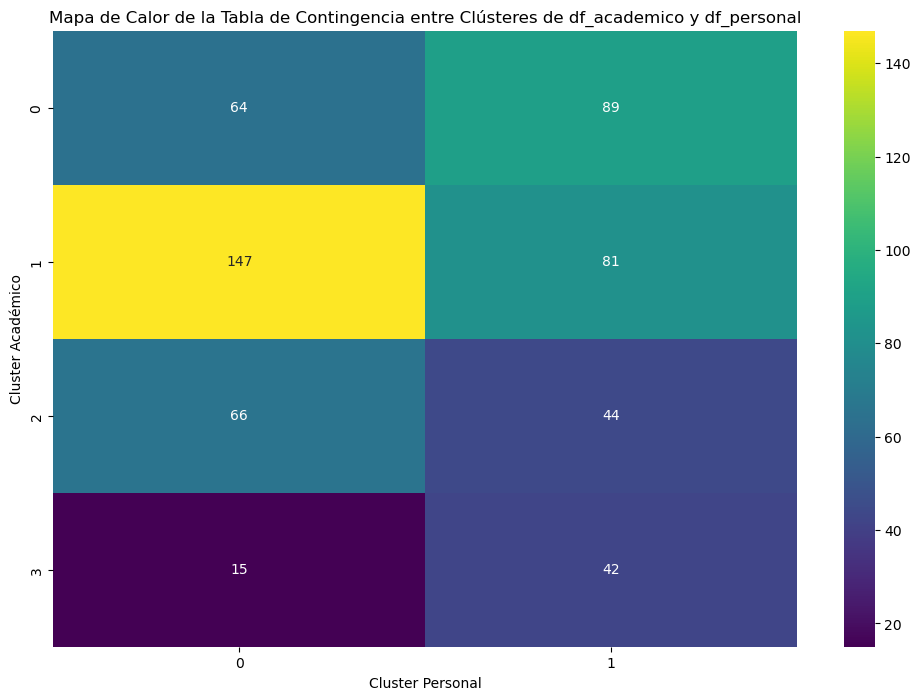

In [116]:
# Crear una tabla de contingencia para comparar los clústeres de df_academico y df_personal
contingency_table = pd.crosstab(df_academico['cluster_4pp'], df_personal['cluster_2pp']) #crosstab crea una tabla de contingencia, que es una tabla que muestra la frecuencia de ocurrencia de diferentes variables


# Identificar las combinaciones con las frecuencias más altas
max_coincidences = contingency_table.stack().idxmax() #idxmax para encontrar la combinación de clústeres con la frecuencia más alta.
max_value = contingency_table.stack().max() #max para obtener el valor máximo de coincidencias
# Mostrar la tabla de contingencia en formato tabla

contingency_table_df = pd.DataFrame(contingency_table)
contingency_table_df.index.name = 'Cluster Académico'
contingency_table_df.columns.name = 'Cluster Personal'

display(contingency_table_df.style.set_caption("Tabla de Contingencia entre Clústeres de df_academico y df_personal").set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16px'), ('font-weight', 'bold')]
}]))

# Mostrar la combinación de clústeres con más coincidencias en formato tabla
max_coincidences_df = pd.DataFrame({
    'Cluster Académico': [max_coincidences[0]],
    'Cluster Personal': [max_coincidences[1]],
    'Frecuencia': [max_value]
})

display(max_coincidences_df.style.set_caption("Combinación de Clústeres con Más Coincidencias").set_table_styles([{
    'selector': 'caption',
    'props': [('font-size', '16px'), ('font-weight', 'bold')]
}]))

# Visualizar la tabla de contingencia con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')
plt.title('Mapa de Calor de la Tabla de Contingencia entre Clústeres de df_academico y df_personal')
plt.xlabel('Cluster Personal')
plt.ylabel('Cluster Académico')
plt.show()

### Conclusiones finales tras el análisis de los clúster:

Tras obviar del análisis las variables indicadas tras el T-test (ver conclusiones) en el df_personal, podemos inferir las siguientes conclusiones:

En primer lugar, el clúster 0 de la parte personal, correspondiente con un entorno más urbano, acceso a recusos tecnológicos y mayor nivel educativo en los padres, se relaciona mayoritariamente, como era de esperar, con el clúster 1 del aspecto académico, correspondiente a los estudiantes destacados, con un alto rendimiento académico y una fuerte motivación para seguir estudiando. Como he mencionado, esta es una relación esperable, pues es lógico que de un entorno favorable, del que se reciba apoyo y los recursos adecuados, florezcan un mayor número de estudiantes sobresalientes que con un entorno desfavorable. Este clúster también está relacionado, aunque en menor medida, con el cluster 2 académico, correspondiente con un rendimiento promedio.

Por otro lado, el clúster 1 de las características personales, correspondiente a individuos de áreas más rurales, con un entorno familiar más tradicional, con menor acceso a tecnología y recursos educativos, se relaciona principalmente con el grupo 0 de académico, correspondiente a estudiantes con apoyo e interés pero que enfrentan desafíos importantes, especialmente a su rendimiento. Podemos aprovechar la explicación anterior para este caso, ya que como comentamos, entornos desfavorables propician estudiantes con dificultades. Esto además se remarca, ya que es el clúster con mayor coincidencia con el clúster 3, correspondiente a estudiantes con dificultades importantes en rendimiento, asistencia y motivación, lo que los coloca en una posición de alto riesgo académico.